# Table of Content

> [1.Business problem Statment](#BPS)

> [2.Data Dictionary](#DD)
>> [2.1 Time Series Dataset](#TS)

>> [2.2 Qualitative Dataset](#QS)

> [3.Questions](#Q)

> [4.Data Loading](#DL)

> [5.Time Series dataset](#TSD)
>> [5.1 Data Overview ](#DO1)

>> [5.2 Data Enrichment](#DE1)

>> [5.3 Data Cleaning ](#DC1)

>> [5.4 Data Analysis](#DA1)

> [6.Store Features Dataset](#SFD)

>> [6.1 Data Overview ](#DO2)

>> [6.2 Data Cleaning](#DC2)

>> [6.3 Data Analysis](#DA2)

> [7.Merged Dataset](#MD)

>> [7.1 Data Overview ](#DO3)

>> [7.2 Corelations](#DC3)

>> [7.3 Analysis on Demographics](#AOD)

>> [7.4 Label Encoding ](#LE)

>> [7.5 Top Contributing Factors ](#TCF)

> [8.Summary](#SU)

> [9.Individual Contribution](#IC)

#<a name = "BPS"> Business problem Statement</a>

A retail convenience chain, Maverik, fuels adventures in more than 380 locations across 12 western states. Maverik is known for premium BonFire food, diesel and unleaded fuel, and in-store merchandise. The company is on an expansion spree and as part of its growth, it recently acquired “ Kum & Go” nearly doubling its store count.

**Problem statement**  
The company is planning to open 30 new stores yearly in a new market, and it needs to forecast daily sales for the new store. This is crucial for financial planning and return on investment (ROI) assessment for these new stores. The challenge lies in predicting the first-year sales for these newly acquired stores accurately.

We have limited amount of data; therefore, we will be using currently available historical dataset to address analytical problems we will be addressing in this project are *identifying trends and patterns in sales data*, *understanding the relationship between sales and other factors*, and *identifying outliers and anomalies*. By addressing these analytical problems, we will be able to build a sales forecasting model.

**Solution**  
We will develop a sales forecasting model that can accurately predict daily sales for the new store. We will be using a variety of forecasting methods, such as time series analysis, regression analysis, causal analysis, and machine learning. The model will be evaluated by comparing its prediction to actual sales data from a holdout dataset. The model performance will be evaluated using industry-standard metrics such as Forecast Accuracy Metrics (e.g. MAE, MAPE, RMSE) and its ability to update forecasts dynamically in response to new data.

This sales forecasting model will help the company to make informed decisions about staffing, inventory, and marketing for the new stores. This can help the company to maximize its profits and minimize its losses while maintaining customer satisfaction.

#<a name = "DD">Data Dictionary</a>

##<a name = "TS"> Time Series Dataset </a>

**capital_projects.soft_opening_date** : The date this store opened

**calendar.calendar_day_date** : date

**calendar.fiscal_week_id_for_year** : Fiscal Week Number

**calendar.day_of_week** : Day of the week

**calendar_information.holiday** : Holiday information for that date

**calendar_information.type_of_day** : Day type

**daily_yoy_ndt.total_inside_sales** : Inside sales, everything that isn't made at the store

**daily_yoy_ndt.total_food_service** : Food service sales, everything that is made at the store

**diesel** : Diesel gallons sold

**unleaded** : all non-diesel(unleaded) gallons sold

**site_id_msba** : Unique site key


##<a name = "QS"> Qualitative Dataset </a>

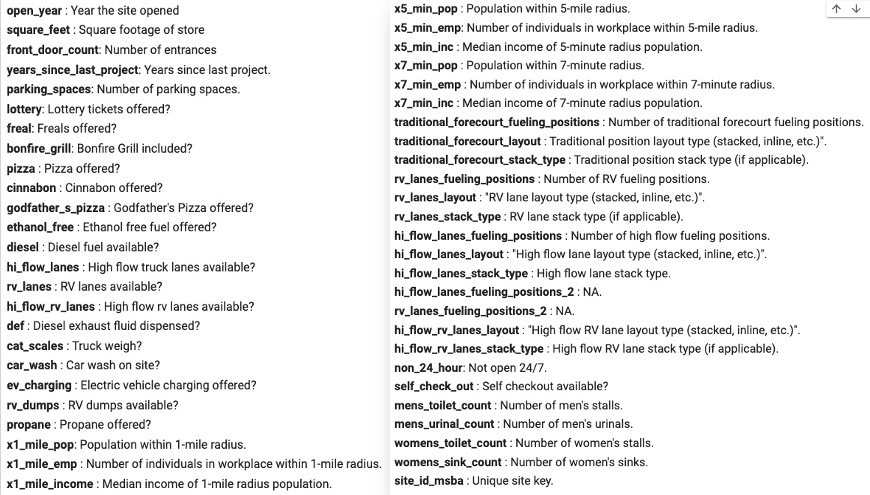

Based on the information given to us thus far, key columns for later merge train & test tables are going to be:

timeseries --> site_id_msba  
qualitative_data --> site_id_msba

#<a name = "Q"> Questions</a>



*   Is there seasonality in gasoline sales?
*   How do sales differ by day?
*   What's the scope of NAs? Should we consider dropping columns based on NAs and variance?
*   What are the trends in sales over time?
* What factors influence the variation in sales across the months?
* Are there any trends in the sales data over time?
* How do the sales of the different products compare to each other?
* What are the key drivers of sales for each category?





#<a name = "DL"> Data Loading</a>

Loading our datasets and adding all necessary packages for the project.

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading and renaming datasets for easy use. Qualitative is named as store_features
timeseries = pd.read_csv('/content/gdrive/MyDrive/Final Capstone - MSBA/Maverik/time_series_data_msba.csv')
store_features = pd.read_csv('/content/gdrive/MyDrive/Final Capstone - MSBA/Maverik/qualitative_data_msba.csv')

#<a name = "TSD"> Time series Dataset </a>

##<a name = "DO1"> Data Overview </a>

In [ ]:
# Displays information about the DataFrame
timeseries.info()

#Top 5 Rows of Dataset
display(timeseries.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          13908 non-null  int64  
 1   capital_projects.soft_opening_date  13908 non-null  object 
 2   calendar.calendar_day_date          13908 non-null  object 
 3   calendar.fiscal_week_id_for_year    13908 non-null  int64  
 4   calendar.day_of_week                13908 non-null  object 
 5   calendar_information.holiday        13908 non-null  object 
 6   calendar_information.type_of_day    13908 non-null  object 
 7   daily_yoy_ndt.total_inside_sales    13908 non-null  float64
 8   daily_yoy_ndt.total_food_service    13908 non-null  float64
 9   diesel                              13908 non-null  float64
 10  unleaded                            13908 non-null  float64
 11  site_id_msba                        13908

Unnamed: 0 capital_projects.soft_opening_date calendar.calendar_day_date  \
0           1                         2022-06-14                 2022-06-17   
1           2                         2022-06-14                 2022-06-22   
2           3                         2022-06-14                 2022-06-23   
3           4                         2022-06-14                 2022-06-26   
4           5                         2022-06-14                 2022-06-27   

   calendar.fiscal_week_id_for_year calendar.day_of_week  \
0                                25               Friday   
1                                25            Wednesday   
2                                25             Thursday   
3                                26               Sunday   
4                                26               Monday   

  calendar_information.holiday calendar_information.type_of_day  \
0                         NONE                          WEEKDAY   
1                         NONE                          WEEKDAY   
2                         NONE                          WEEKDAY   
3                         NONE                          WEEKEND   
4                         NONE                          WEEKDAY   

   daily_yoy_ndt.total_inside_sales  daily_yoy_ndt.total_food_service  \
0                         2168.2920                          861.6930   
1                         2051.5635                          808.0275   
2                         2257.5000                          966.4410   
3                         1520.5925                          542.3250   
4                         1897.6930                          771.4525   

     diesel   unleaded  site_id_msba  
0  722.7745  1425.1020         24535  
1  730.4850  1436.2740         24535  
2  895.7970  1594.3725         24535  
3  584.2900  1124.9280         24535  
4  852.2605  1640.2540         24535

Starting position of timeseries dataset -- 12 columns, 13908 rows. dtypes: float64(4), int64(3), object(5). There seems to be redundancy in data index with "Unnamed" column; therefore, this is being deleted below.

In [ ]:
timeseries = timeseries.drop(timeseries.columns[0], axis = 1)

#Dataset overview after dropping unnamed column.
timeseries.head()

capital_projects.soft_opening_date calendar.calendar_day_date  \
0                         2022-06-14                 2022-06-17   
1                         2022-06-14                 2022-06-22   
2                         2022-06-14                 2022-06-23   
3                         2022-06-14                 2022-06-26   
4                         2022-06-14                 2022-06-27   

   calendar.fiscal_week_id_for_year calendar.day_of_week  \
0                                25               Friday   
1                                25            Wednesday   
2                                25             Thursday   
3                                26               Sunday   
4                                26               Monday   

  calendar_information.holiday calendar_information.type_of_day  \
0                         NONE                          WEEKDAY   
1                         NONE                          WEEKDAY   
2                         NONE                          WEEKDAY   
3                         NONE                          WEEKEND   
4                         NONE                          WEEKDAY   

   daily_yoy_ndt.total_inside_sales  daily_yoy_ndt.total_food_service  \
0                         2168.2920                          861.6930   
1                         2051.5635                          808.0275   
2                         2257.5000                          966.4410   
3                         1520.5925                          542.3250   
4                         1897.6930                          771.4525   

     diesel   unleaded  site_id_msba  
0  722.7745  1425.1020         24535  
1  730.4850  1436.2740         24535  
2  895.7970  1594.3725         24535  
3  584.2900  1124.9280         24535  
4  852.2605  1640.2540         24535

In [ ]:
timeseries.dtypes

capital_projects.soft_opening_date     object
calendar.calendar_day_date             object
calendar.fiscal_week_id_for_year        int64
calendar.day_of_week                   object
calendar_information.holiday           object
calendar_information.type_of_day       object
daily_yoy_ndt.total_inside_sales      float64
daily_yoy_ndt.total_food_service      float64
diesel                                float64
unleaded                              float64
site_id_msba                            int64
dtype: object

**Which features are categorical?**  
These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based. Among other things this helps us select the appropriate plots for visualization.



Categorical feature :  5  
['capital_projects.soft_opening_date', 'calendar.calendar_day_date', 'calendar.day_of_week', 'calendar_information.holiday', 'calendar_information.type_of_day']

**Which features are numerical?**  
These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based. Among other things this helps us select the appropriate plots for visualization.

Numerical feature :  6  
Discrete feature :  0  
Continous feature :  6  
['calendar.fiscal_week_id_for_year', 'daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded', 'site_id_msba']

##<a name = "DE1"> Data Enrichment </a>

In [ ]:
timeseries['capital_projects.soft_opening_date'] = pd.to_datetime(timeseries['capital_projects.soft_opening_date'])
timeseries['calendar.calendar_day_date'] = pd.to_datetime(timeseries['calendar.calendar_day_date'])


In [ ]:
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   capital_projects.soft_opening_date  13908 non-null  datetime64[ns]
 1   calendar.calendar_day_date          13908 non-null  datetime64[ns]
 2   calendar.fiscal_week_id_for_year    13908 non-null  int64         
 3   calendar.day_of_week                13908 non-null  object        
 4   calendar_information.holiday        13908 non-null  object        
 5   calendar_information.type_of_day    13908 non-null  object        
 6   daily_yoy_ndt.total_inside_sales    13908 non-null  float64       
 7   daily_yoy_ndt.total_food_service    13908 non-null  float64       
 8   diesel                              13908 non-null  float64       
 9   unleaded                            13908 non-null  float64       
 10  site_id_msba          

These lines of code convert the 'capital_projects.soft_opening_date' and 'calendar.calendar_day_date' columns from their current data type to datetime data type . This conversion allows for more effective handling and analysis of date-related data.

In [ ]:
timeseries= timeseries.set_index('calendar.calendar_day_date')

This line of code sets the 'calendar.calendar_day_date' column as the "index" of the DataFrame 'time_series'. This means that the date column is used as the row labels for the DataFrame, which can be helpful for time series analysis and accessing data by date.

In [ ]:
timeseries['Year'] = timeseries.index.year
timeseries['Month'] = timeseries.index.month
timeseries['Day'] = timeseries.index.day
timeseries['DayOfYear'] = timeseries.index.dayofyear

These lines of code create new columns in the 'time_series' DataFrame: 'Year', 'Month', 'Day', and 'DayOfYear'.

- 'Year' column stores the year component of the date.
- 'Month' column stores the month component of the date.
- 'Day' column stores the day component of the date.
- 'DayOfYear' column stores the day of the year for each date.

In [ ]:
#Creating function to calculate season
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

#Adds "season" column to the timeseries dataset
timeseries['season'] = timeseries.index.month.map(map_month_to_season)

This code defines a function `map_month_to_season` that takes a month (numeric) as input and returns a corresponding season as a string.  Seasons are categorized as 'Winter' (December, January, February), 'Spring' (March, April, May), 'Summer' (June, July, August), and 'Fall' (September, October, November).

In [ ]:
timeseries.sort_index(inplace=True)

The code sorts the DataFrame 'time_series' based on its index in ascending order.  After executing this code, the 'time_series' DataFrame will be sorted based on its index, and the rows will be arranged in ascending order of the index values.

In [ ]:
#Overview of the dataset
timeseries.head()

capital_projects.soft_opening_date  \
calendar.calendar_day_date                                      
2021-01-12                                         2021-01-12   
2021-01-13                                         2021-01-12   
2021-01-14                                         2021-01-12   
2021-01-15                                         2021-01-12   
2021-01-16                                         2021-01-12   

                            calendar.fiscal_week_id_for_year  \
calendar.calendar_day_date                                     
2021-01-12                                                 2   
2021-01-13                                                 2   
2021-01-14                                                 2   
2021-01-15                                                 3   
2021-01-16                                                 3   

                           calendar.day_of_week calendar_information.holiday  \
calendar.calendar_day_date                                                     
2021-01-12                              Tuesday                         NONE   
2021-01-13                            Wednesday                         NONE   
2021-01-14                             Thursday                         NONE   
2021-01-15                               Friday                         NONE   
2021-01-16                             Saturday                         NONE   

                           calendar_information.type_of_day  \
calendar.calendar_day_date                                    
2021-01-12                                          WEEKDAY   
2021-01-13                                          WEEKDAY   
2021-01-14                                          WEEKDAY   
2021-01-15                                          WEEKDAY   
2021-01-16                                          WEEKEND   

                            daily_yoy_ndt.total_inside_sales  \
calendar.calendar_day_date                                     
2021-01-12                                         2036.2685   
2021-01-13                                         2379.8880   
2021-01-14                                         2435.8600   
2021-01-15                                         2805.9780   
2021-01-16                                         2314.7635   

                            daily_yoy_ndt.total_food_service     diesel  \
calendar.calendar_day_date                                                
2021-01-12                                          762.8530  1424.1850   
2021-01-13                                         1003.7930  1303.8445   
2021-01-14                                          974.2250  1375.6785   
2021-01-15                                          911.0115  1334.9175   
2021-01-16                                          715.7535   831.1625   

                             unleaded  site_id_msba  Year  Month  Day  \
calendar.calendar_day_date                                              
2021-01-12                  1522.0030         21560  2021      1   12   
2021-01-13                  1853.7715         21560  2021      1   13   
2021-01-14                  2122.4070         21560  2021      1   14   
2021-01-15                  2267.9930         21560  2021      1   15   
2021-01-16                  1819.6395         21560  2021      1   16   

                            DayOfYear  season  
calendar.calendar_day_date                     
2021-01-12                         12  Winter  
2021-01-13                         13  Winter  
2021-01-14                         14  Winter  
2021-01-15                         15  Winter  
2021-01-16                         16  Winter

##<a name = "DC1"> Data Cleaning </a>

In [ ]:
timeseries.nunique()

capital_projects.soft_opening_date       32
calendar.fiscal_week_id_for_year         52
calendar.day_of_week                      7
calendar_information.holiday             26
calendar_information.type_of_day          2
daily_yoy_ndt.total_inside_sales      13791
daily_yoy_ndt.total_food_service      13529
diesel                                13775
unleaded                              13812
site_id_msba                             38
Year                                      3
Month                                    12
Day                                      31
DayOfYear                               365
season                                    4
dtype: int64

The Above table display the number of Unique values present in each column.  It indicates that Data is provided for 38 site_ids for 3 years. It also indicated the number of holidays as 26. There are two types of day( weekday and weekend).

In [ ]:
#Function to calculate percent null
def null_values(dataframe):
    return dataframe.isnull().sum()/dataframe.shape[0]*100

#Calculated null values
null_values(timeseries)

capital_projects.soft_opening_date    0.0
calendar.fiscal_week_id_for_year      0.0
calendar.day_of_week                  0.0
calendar_information.holiday          0.0
calendar_information.type_of_day      0.0
daily_yoy_ndt.total_inside_sales      0.0
daily_yoy_ndt.total_food_service      0.0
diesel                                0.0
unleaded                              0.0
site_id_msba                          0.0
Year                                  0.0
Month                                 0.0
Day                                   0.0
DayOfYear                             0.0
season                                0.0
dtype: float64

There are no null values in this dataset.

In [ ]:
# Function to count outliers in a column
def count_outliers(column):
    mean_value = column.mean()
    std_dev = column.std()
    threshold = 3.5 * std_dev
    is_outlier = (column > mean_value + threshold)
    return np.sum(is_outlier)

# Filter out object type columns
numerical_data = timeseries.select_dtypes(include=[np.number])

# Initialize a list to store results
results = []

# Calculate and store the count of values, outliers, missing values, and percentage of missing values for each numerical column
for col in numerical_data.columns:
    num_values = numerical_data[col].count()
    num_outliers = count_outliers(numerical_data[col])
    results.append([col, num_values, num_outliers])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=["Column Name", " Values", " Outliers"])

# sorted_results_df = results_df.sort_values(by='Outliers', ascending=False)
# sorted_results_df

print(results_df)

                        Column Name   Values   Outliers
0  calendar.fiscal_week_id_for_year    13908          0
1  daily_yoy_ndt.total_inside_sales    13908         72
2  daily_yoy_ndt.total_food_service    13908        116
3                            diesel    13908        230
4                          unleaded    13908         86
5                      site_id_msba    13908          0
6                              Year    13908          0
7                             Month    13908          0
8                               Day    13908          0
9                         DayOfYear    13908          0


The above output indicates that 4 target sales variable contain Outliers ( Sigma > 3.5) and the count of outliers is indicated. The percentage of outliers is very minimal ( < 2%) and hence we have planned to retain all these for data exploration and analysis.

##<a name = "DA1"> Data Analysis</a>

###Correlations

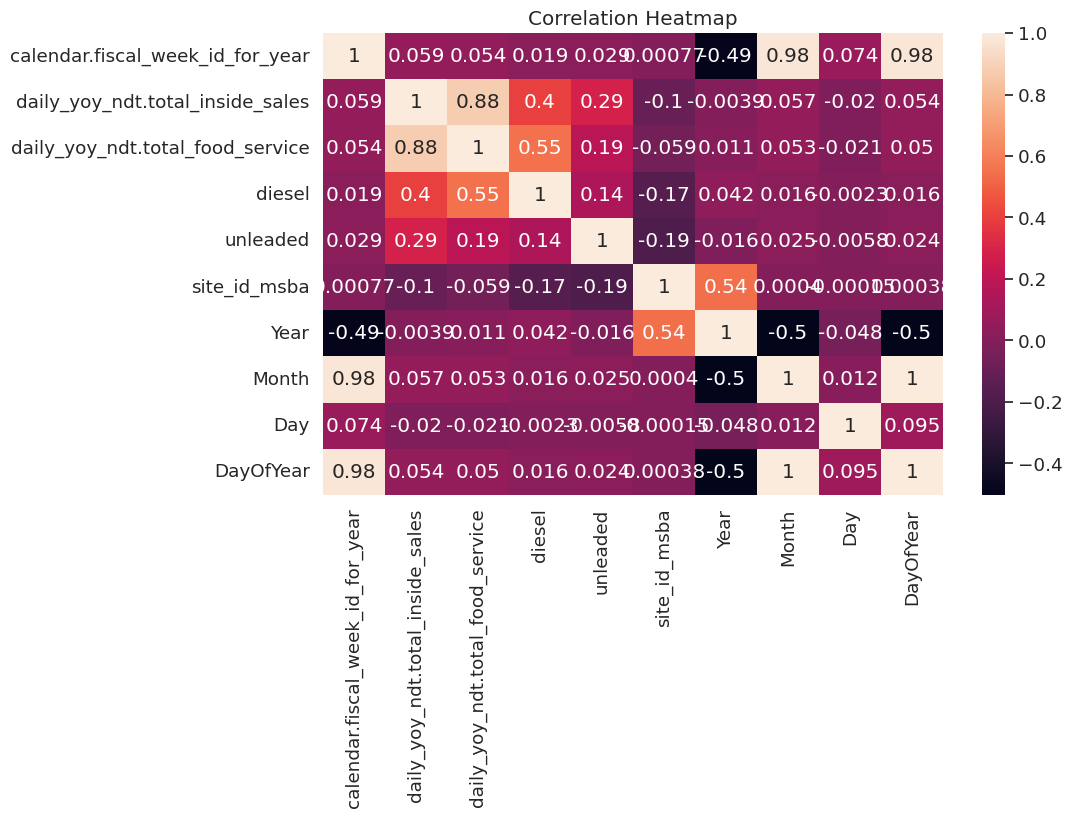

In [ ]:
# Heatmap of correlation between features
plt.figure(figsize = (10,6))
sns.heatmap(timeseries.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

This heatmap shows correlations between features in the timeseries dataset. We see that food service and inside sales are highly correlated with 0.88, and moderate correlation between diesel and food service sales. This will help us understand relationship between our features and how to approach them.

### Correlations Among Target Variables

In [ ]:
#Filtering target variables
target_var= timeseries[['daily_yoy_ndt.total_food_service','daily_yoy_ndt.total_inside_sales','diesel','unleaded']]


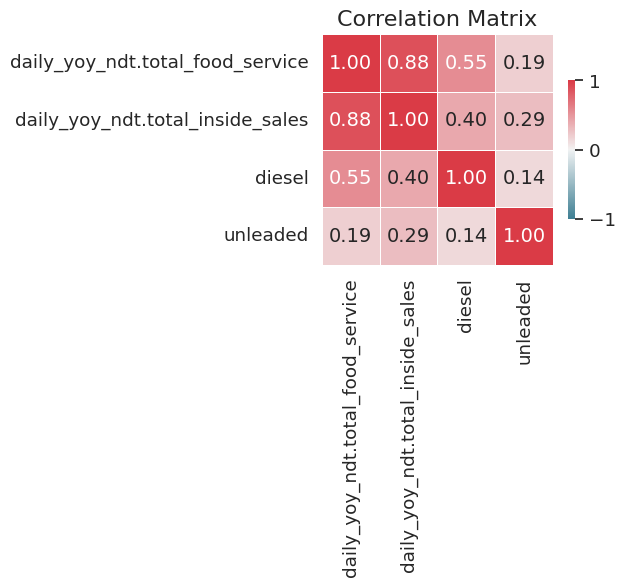

In [ ]:
# Calculate the correlation matrix
correlation_matrix = target_var.corr()

# Create a beautiful correlation grid with correlation factors
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Use a diverging color palette for better visualization
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Create the correlation heatmap with annotated correlation values
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": 0.6}, annot_kws={"size": 14})

plt.title("Correlation Matrix", fontsize=16)
plt.show()


The correlation matrix above reveals significant associations between various factors. Specifically, it highlights a strong correlation of 0.88 between food services and inside sales, suggesting that as food sales increase, so do inside sales. Additionally, there is a moderate correlation of 0.55 between diesel and food services, indicating some degree of connection between these two variables. On the other hand, inside sales and unleaded fuel exhibit a weaker correlation of 0.29, while diesel and food services have an even weaker correlation of 0.14.

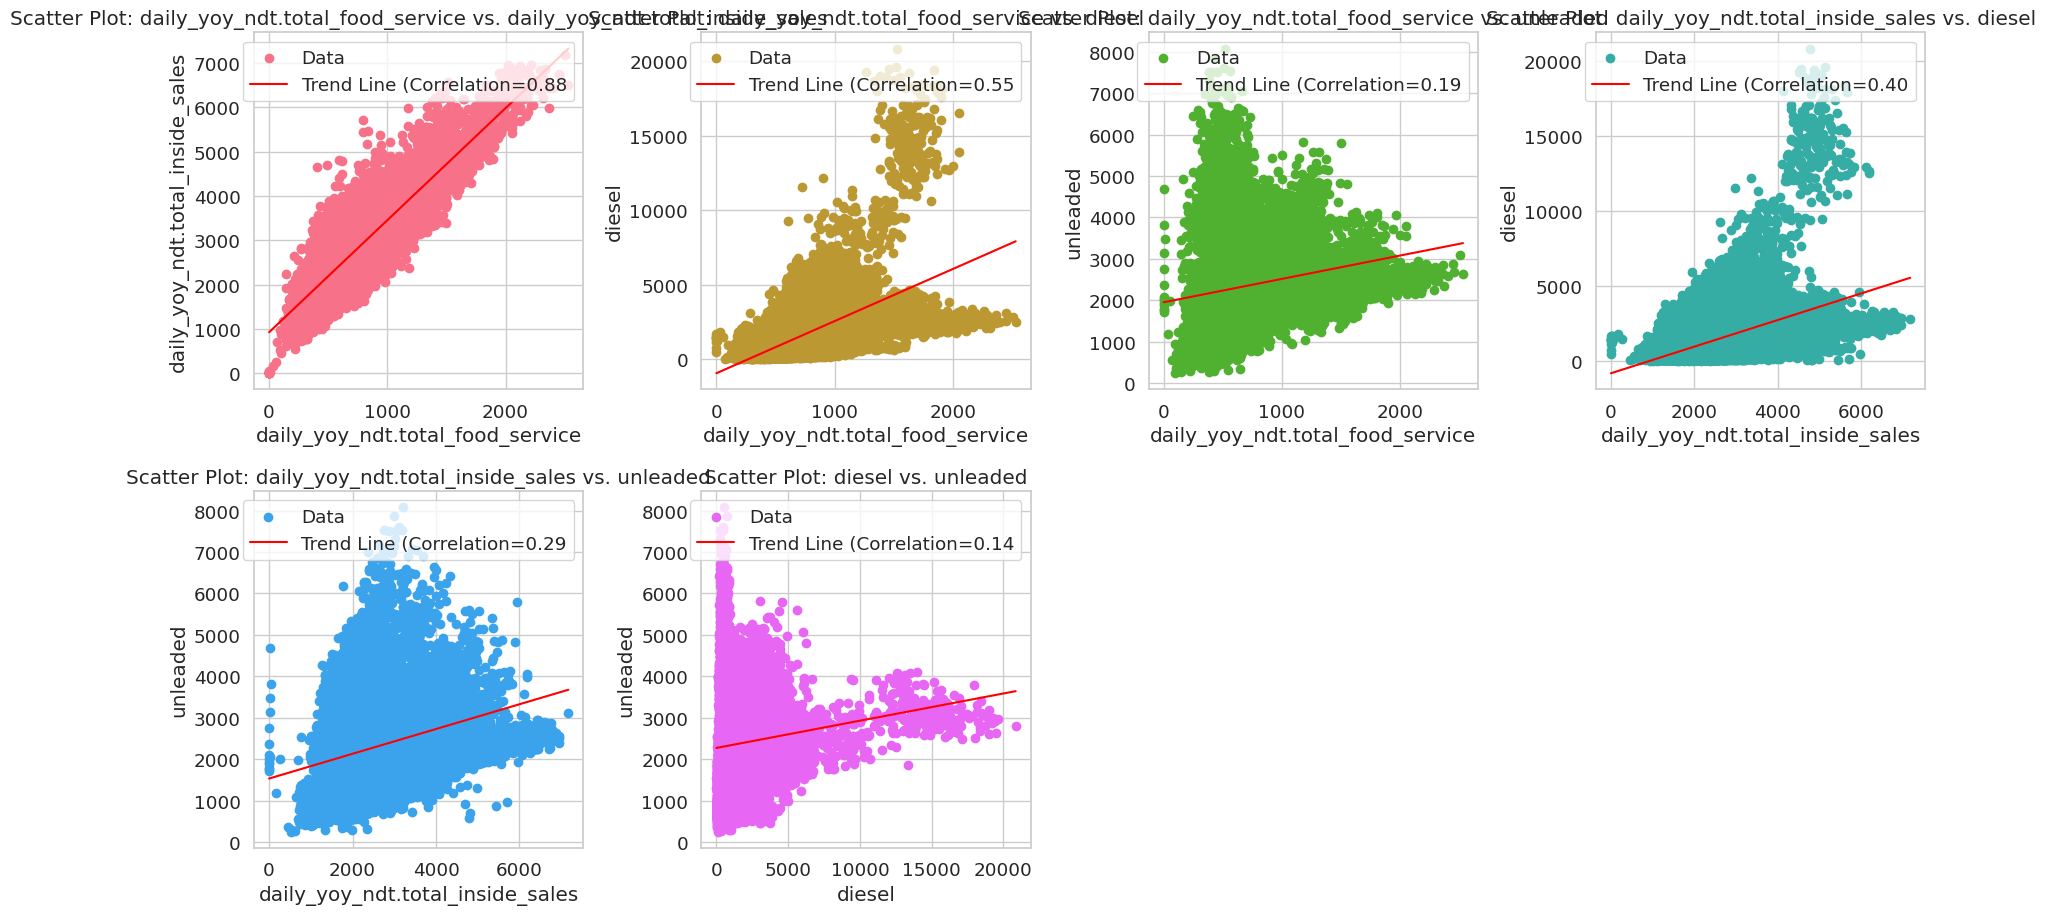

In [ ]:
# Get all combinations of the target variable names (4 choose 2)
target_combinations = list(combinations(target_var.columns, 2))

# Define a color palette with different colors for each plot
colors = sns.color_palette('husl', len(target_combinations))

# Create a 4x4 grid of scatter plots with trend lines and different colors
plt.figure(figsize=(18, 18))

for i, (var1, var2) in enumerate(target_combinations, start=1):
    plt.subplot(4, 4, i)
    plt.scatter(target_var[var1], target_var[var2], label='Data', color=colors[i - 1])

    # Calculate the linear regression coefficients
    coeffs = np.polyfit(target_var[var1], target_var[var2], 1)
    x_range = np.array([min(target_var[var1]), max(target_var[var1])])
    trend_line = coeffs[0] * x_range + coeffs[1]

    # Calculate the correlation coefficient
    correlation = np.corrcoef(target_var[var1], target_var[var2])[0, 1]

    # Add the trend line with correlation value to the plot
    plt.plot(x_range, trend_line, color='red', label=f'Trend Line (Correlation={correlation:.2f}')

    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Scatter Plot: {var1} vs. {var2}')
    plt.legend()

plt.tight_layout()
plt.show()


This code has been designed to create a grid of scatter plots for the purpose of visually exploring and comparing relationships between pairs of target variables. Within these plots, trend lines have been incorporated to emphasize any linear trends present in the data, with different colors employed to distinguish between the individual plots.

The trend line connecting food services and inside sales showcases a positive correlation, with a coefficient of 0.88.
The trend line linking food services and diesel sales reveals a moderate level of correlation, quantified at 0.55.
The trend line pertaining to food services and unleaded sales illustrates a weak correlation, registering a coefficient of 0.19.
The trend line associated with inside sales and diesel sales demonstrates a moderate correlation, with a coefficient of 0.40.
The trend line between inside sales and unleaded sales suggests a weak correlation, as indicated by a coefficient of 0.29.
The trend line connecting unleaded and diesel sales portrays a very weak correlation, quantified at 0.14. There are no negative correlations among our target variables.

###Density plot- Target Variables

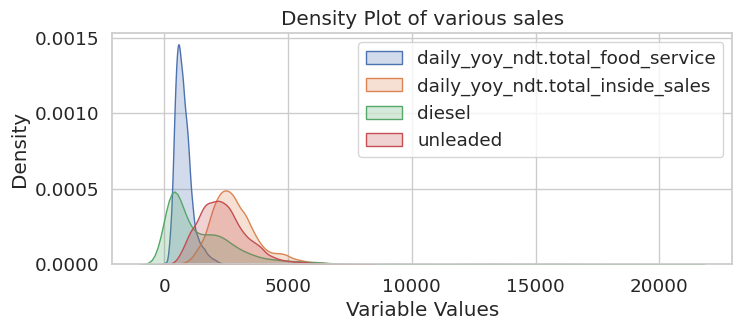

In [ ]:
# Create a figure and axis
plt.figure(figsize=(8, 3))

# Loop through each variable and plot its density curve
for variable in target_var:
    sns.kdeplot(timeseries[variable], shade=True, label=variable)

# Add labels and a title
plt.xlabel('Variable Values')
plt.ylabel('Density')
plt.title('Density Plot of various sales')

# Add a legend to distinguish the variables
plt.legend()

# Show the plot
plt.show()



1. **Food Services Curve - Narrower Plot (Less Variability):** When the density plot for food services has a narrower shape, it implies that most data points are concentrated closely around a central range. In other words, there is less spread or dispersion in food services data. This suggests that the values for food services tend to be relatively consistent or clustered around a specific level.

2. **Diesel and Unleaded Sales - Wider Plot (Greater Variability):** A wider density plot for Diesel and unleaded sales indicates that these variables have more variability. Data points are more spread out across a wider range of values. This suggests that there is a greater diversity in the values of Diesel and unleaded sales, with some data points being significantly higher or lower than the central tendency.

3. **Inside Sales - Moderate Variability:** Inside sales fall in between, showing moderate variability. This suggests that while inside sales data points do spread out more than food services, they are not as widely dispersed as Diesel and unleaded sales.

The specific characteristics of these distributions:

- **Food Sales High Peak (High-Density Values):** The prominent peak in the food sales curve indicates that there is a high concentration of data points around a particular value. This central value is associated with high-density values, meaning it's the most common or frequently observed value for food sales.

- **Diesel and Unleaded Sales Skewed to the Right (Rightward Skew):** When Diesel and unleaded sales plots are skewed to the right, it means that there is a longer tail of data points extending towards the higher values. In other words, there are a few data points with much higher sales values that pull the distribution to the right. This suggests that there may be outliers or exceptionally high sales in these categories.

- **Inside Sales Normally Distributed with Slight Right Skew:** Inside sales appear to follow a nearly normal distribution, which is a symmetrical distribution with a characteristic bell-shaped curve. The slight right skew suggests a minor bias towards higher sales values but is not as pronounced as in Diesel and unleaded sales.

In summary, the density plot provides a comprehensive view of the spread, central tendencies, and skewness of the data for different target variables. It helps you understand the variability and distribution characteristics of each variable, enabling more informed data analysis and decision-making.

### Initial Sales Growth

Below we will be looking into sales growth in the initial period for randomly selected stores.

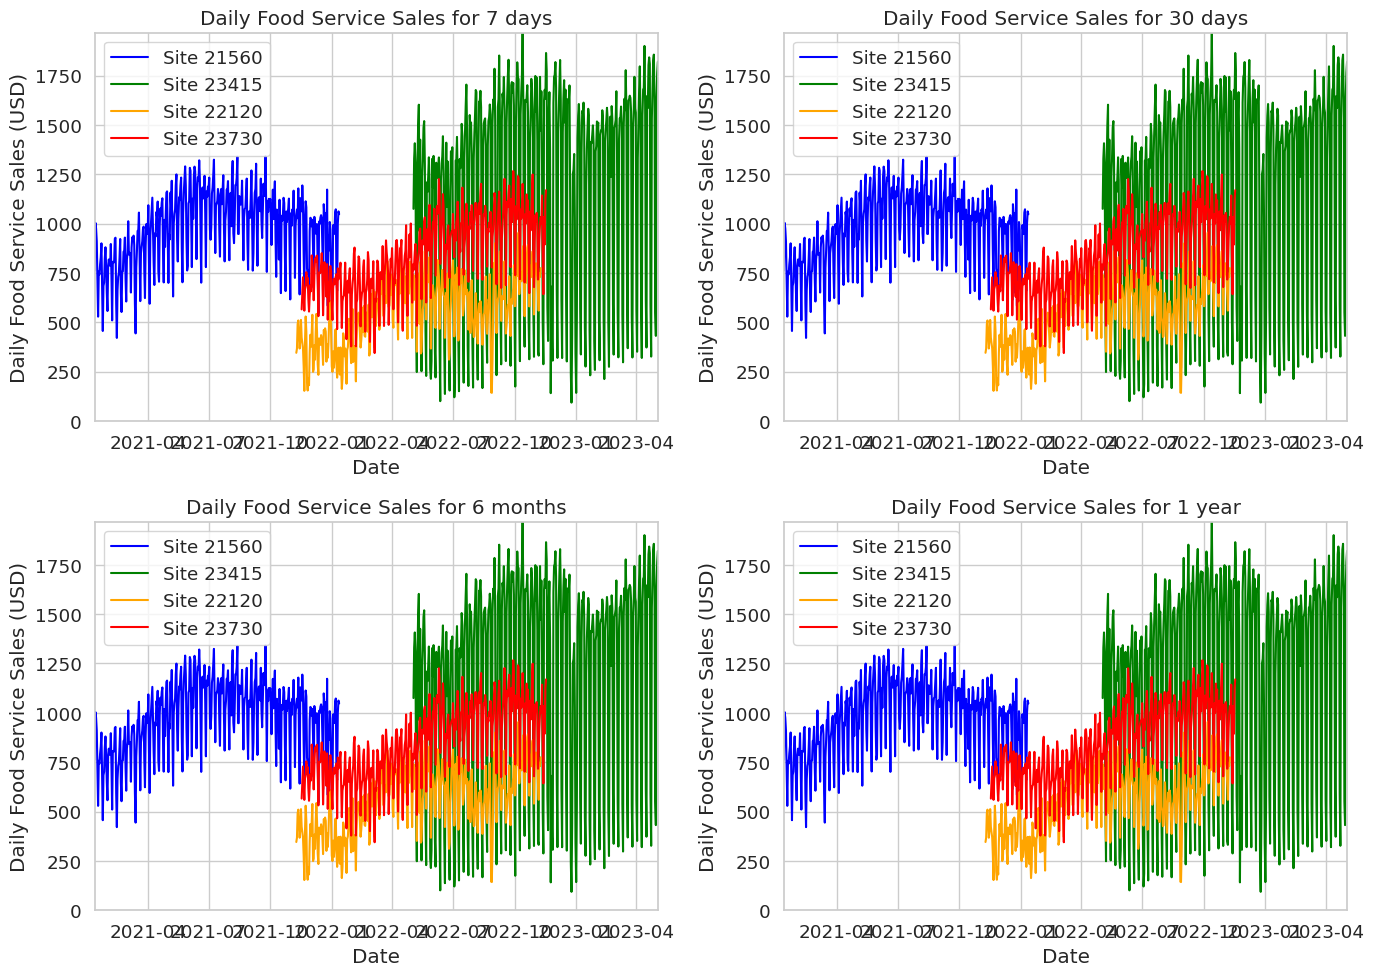

In [ ]:
# Select the top 4 site IDs
top_4_site_ids = timeseries['site_id_msba'].value_counts()[:4].index.tolist()
time_series_data_filtered = timeseries[timeseries['site_id_msba'].isin(top_4_site_ids)]

# Sort the data by calendar_day_date
time_series_data_filtered = time_series_data_filtered.sort_values(by='calendar.calendar_day_date')

# Calculate growth rates
time_series_data_filtered['growth_rate_7d'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(7)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(7)
time_series_data_filtered['growth_rate_30d'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(30)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(30)
time_series_data_filtered['growth_rate_6m'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(180)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(180)
time_series_data_filtered['growth_rate_1y'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(365)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(365)

# Set a consistent style for all charts
sns.set_style('whitegrid')

# Create a figure with adjusted size
fig = plt.figure(figsize=(14, 10))

# Define a set of colors to cycle through
colors = ['blue', 'green', 'orange', 'red']

# Create a subplot for each time period
for i, time_period in enumerate(['7 days', '30 days', '6 months', '1 year']):
    ax = fig.add_subplot(2, 2, i + 1)

    # Plot the data for each site ID with a different color
    for j, site_id in enumerate(top_4_site_ids):
        site_data = time_series_data_filtered[time_series_data_filtered['site_id_msba'] == site_id]
        ax.plot(site_data.index, site_data['daily_yoy_ndt.total_food_service'], label=f'Site {site_id}', color=colors[j % len(colors)])  # Use modulo to cycle through colors

    # Add a grid to the chart
    ax.grid(True)

    # Set the axis limits so that all data points are visible
    ax.set_xlim(time_series_data_filtered.index.min(), time_series_data_filtered.index.max())
    ax.set_ylim(0, time_series_data_filtered['daily_yoy_ndt.total_food_service'].max())  # Adjust y-axis limit

    # Add a title and labels to the chart
    ax.set_title(f'Daily Food Service Sales for {time_period}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Food Service Sales (USD)')
    ax.legend()

# Tighten the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()


Daily food service sales have increased
at all four sites over the past 7 days.

The growth rate is highest at Site 23415, and lowest at Site 22120.

The variation in growth rate could be due to a number of factors, such as location, target market, and season.

Overall, the graph shows that the food service sales is experiencing positive growth.

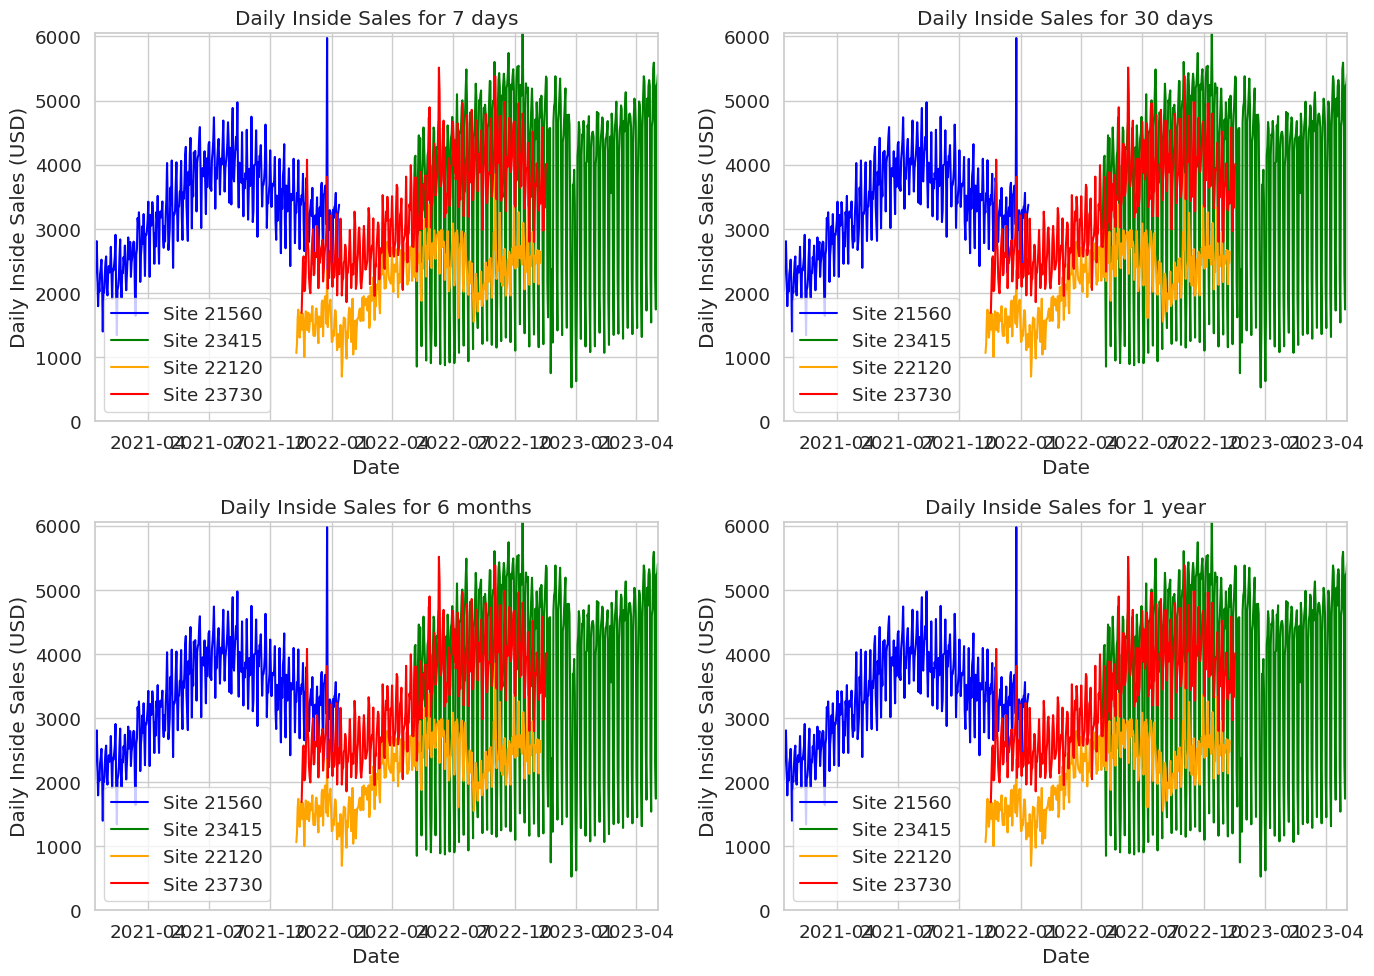

In [ ]:
# Calculate growth rates
time_series_data_filtered['growth_rate_7d'] = (time_series_data_filtered['daily_yoy_ndt.total_inside_sales'] - time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(7)) / time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(7)
time_series_data_filtered['growth_rate_30d'] = (time_series_data_filtered['daily_yoy_ndt.total_inside_sales'] - time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(30)) / time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(30)
time_series_data_filtered['growth_rate_6m'] = (time_series_data_filtered['daily_yoy_ndt.total_inside_sales'] - time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(180)) / time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(180)
time_series_data_filtered['growth_rate_1y'] = (time_series_data_filtered['daily_yoy_ndt.total_inside_sales'] - time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(365)) / time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(365)

# Set a consistent style for all charts
sns.set_style('whitegrid')

# Create a figure with adjusted size
fig = plt.figure(figsize=(14, 10))

# Define a set of colors to cycle through
colors = ['blue', 'green', 'orange', 'red']

# Create a subplot for each time period
for i, time_period in enumerate(['7 days', '30 days', '6 months', '1 year']):
    ax = fig.add_subplot(2, 2, i + 1)

    # Plot the data for each site ID with a different color
    for j, site_id in enumerate(top_4_site_ids):
        site_data = time_series_data_filtered[time_series_data_filtered['site_id_msba'] == site_id]
        ax.plot(site_data.index, site_data['daily_yoy_ndt.total_inside_sales'], label=f'Site {site_id}', color=colors[j % len(colors)])  # Use modulo to cycle through colors

    # Add a grid to the chart
    ax.grid(True)

    # Set the axis limits so that all data points are visible
    ax.set_xlim(time_series_data_filtered.index.min(), time_series_data_filtered.index.max())
    ax.set_ylim(0, time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].max())  # Adjust y-axis limit

    # Add a title and labels to the chart
    ax.set_title(f'Daily Inside Sales for {time_period}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Inside Sales (USD)')
    ax.legend()

# Tighten the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()


The growth rate is highest in the early time periods, and decreases over time.

The growth rate is most similar for Site 21560 and Site 23415, while Site 23730 and Site 22120 have lower growth rates.

The growth rate is most consistent for Site 23415, while Site 22120, Site 21560, and Site 23730 have some fluctuations.

Overall, the graph provides a positive outlook for the inside sales business



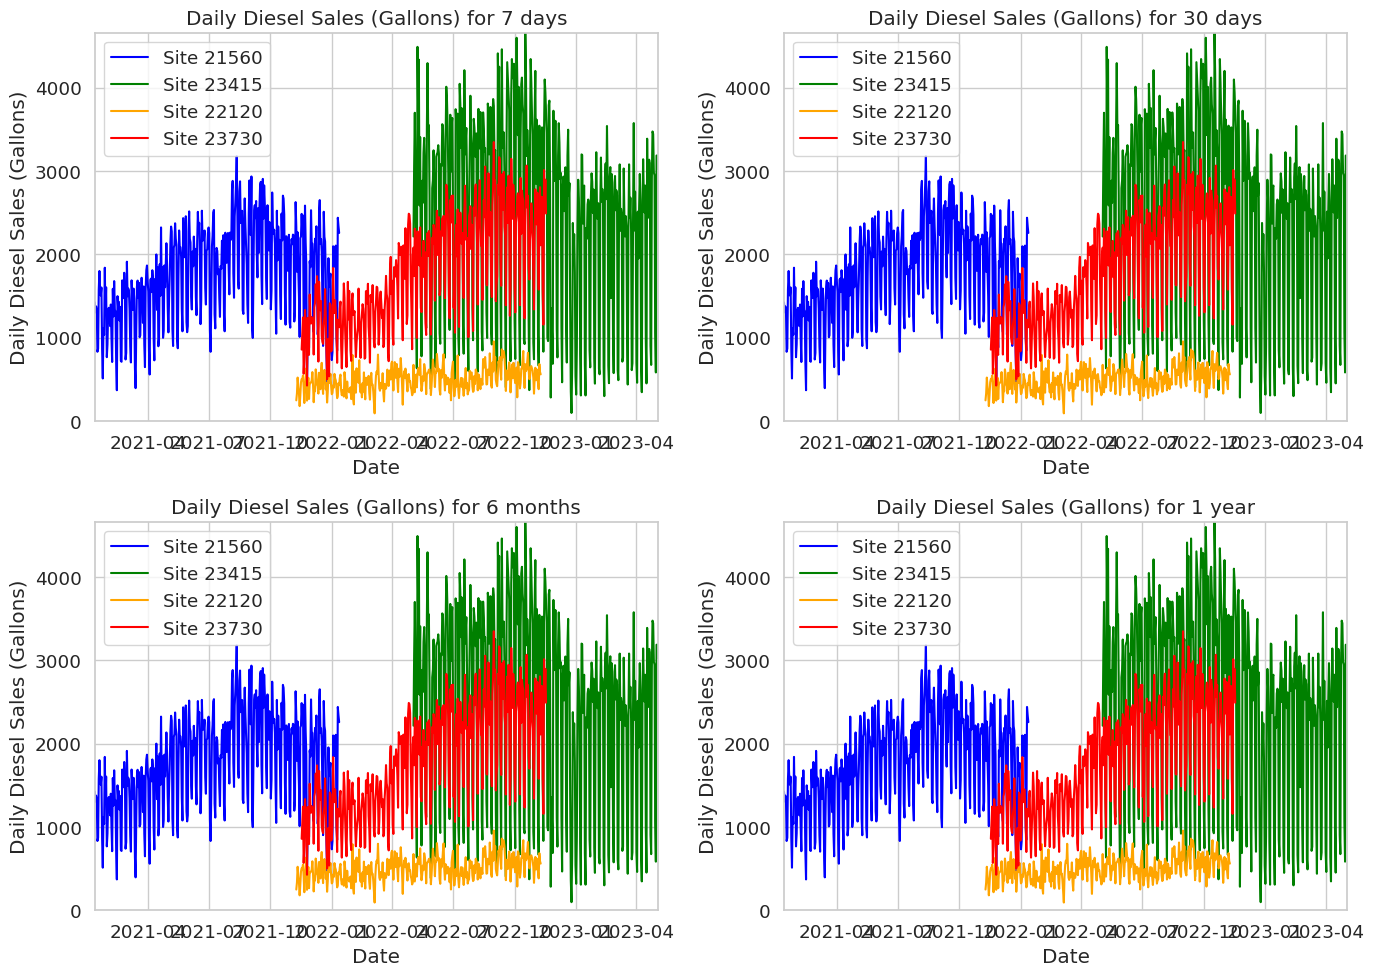

In [ ]:
# Calculate growth rates
time_series_data_filtered['growth_rate_7d'] = (time_series_data_filtered['diesel'] - time_series_data_filtered['diesel'].shift(7)) / time_series_data_filtered['diesel'].shift(7)
time_series_data_filtered['growth_rate_30d'] = (time_series_data_filtered['diesel'] - time_series_data_filtered['diesel'].shift(30)) / time_series_data_filtered['diesel'].shift(30)
time_series_data_filtered['growth_rate_6m'] = (time_series_data_filtered['diesel'] - time_series_data_filtered['diesel'].shift(180)) / time_series_data_filtered['diesel'].shift(180)
time_series_data_filtered['growth_rate_1y'] = (time_series_data_filtered['diesel'] - time_series_data_filtered['diesel'].shift(365)) / time_series_data_filtered['diesel'].shift(365)

# Set a consistent style for all charts
sns.set_style('whitegrid')

# Create a figure with adjusted size
fig = plt.figure(figsize=(14, 10))

# Define a set of colors to cycle through
colors = ['blue', 'green', 'orange', 'red']

# Create a subplot for each time period
for i, time_period in enumerate(['7 days', '30 days', '6 months', '1 year']):
    ax = fig.add_subplot(2, 2, i + 1)

    # Plot the data for each site ID with a different color
    for j, site_id in enumerate(top_4_site_ids):
        site_data = time_series_data_filtered[time_series_data_filtered['site_id_msba'] == site_id]
        ax.plot(site_data.index, site_data['diesel'], label=f'Site {site_id}', color=colors[j % len(colors)])  # Use modulo to cycle through colors

    # Add a grid to the chart
    ax.grid(True)

    # Set the axis limits so that all data points are visible
    ax.set_xlim(time_series_data_filtered.index.min(), time_series_data_filtered.index.max())
    ax.set_ylim(0, time_series_data_filtered['diesel'].max())  # Adjust y-axis limit

    # Add a title and labels to the chart
    ax.set_title(f'Daily Diesel Sales (Gallons) for {time_period}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Diesel Sales (Gallons)')
    ax.legend()

# Tighten the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()


The decline in daily diesel sales is most pronounced

The decline in daily diesel sales is more consistent at Site 23415 and Site 21560 than at the other sites.

A decrease in demand for diesel fuel due to the transition to renewable energy sources or the increasing popularity of electric vehicles or seasonal trend

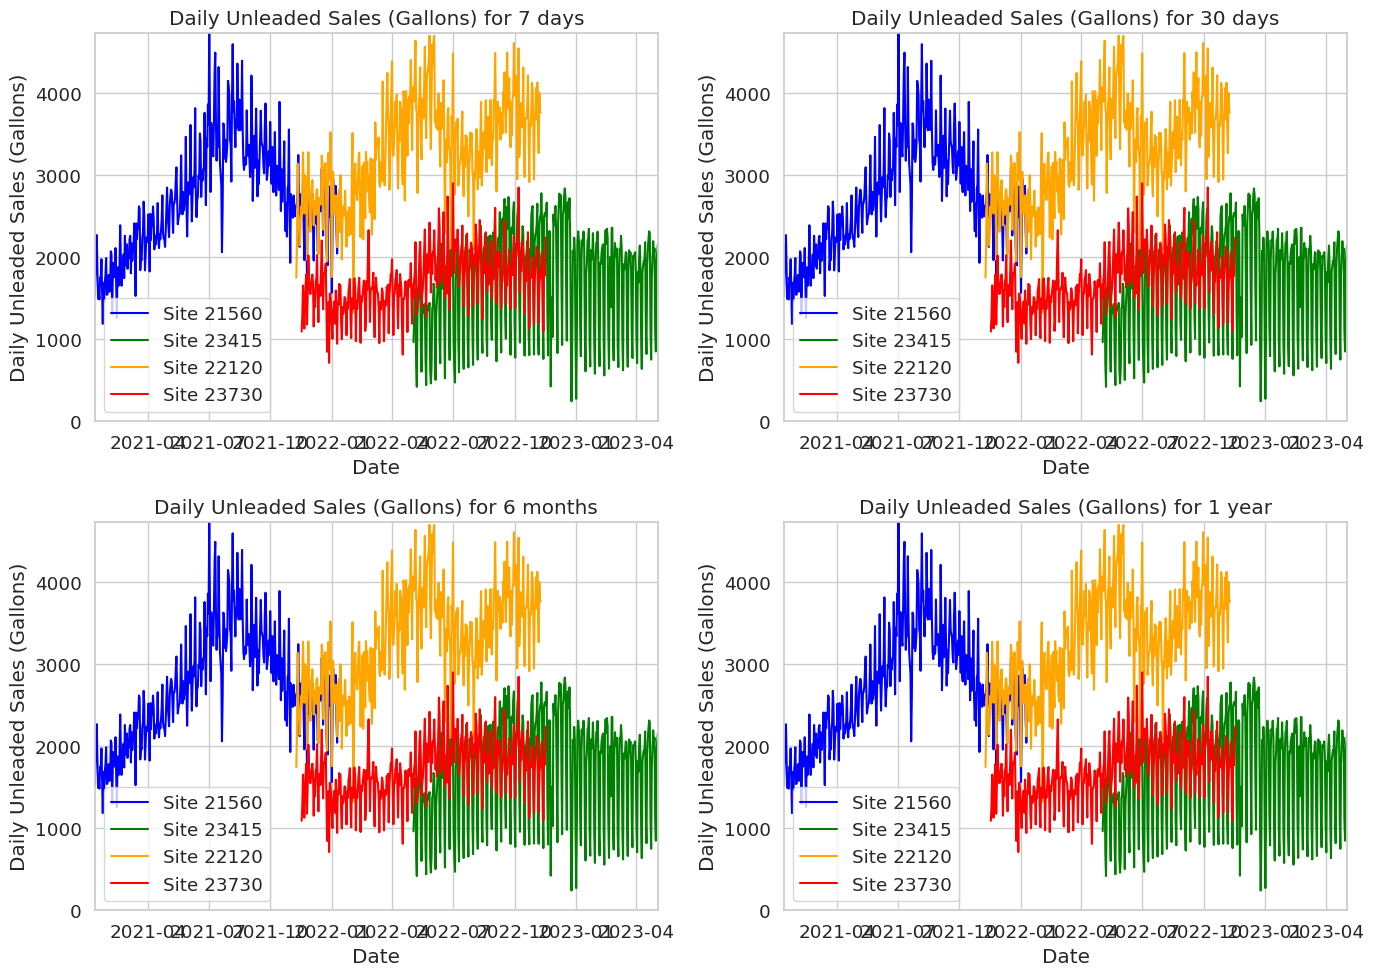

In [ ]:

# Calculate growth rates
time_series_data_filtered['growth_rate_7d'] = (time_series_data_filtered['unleaded'] - time_series_data_filtered['unleaded'].shift(7)) / time_series_data_filtered['unleaded'].shift(7)
time_series_data_filtered['growth_rate_30d'] = (time_series_data_filtered['unleaded'] - time_series_data_filtered['unleaded'].shift(30)) / time_series_data_filtered['unleaded'].shift(30)
time_series_data_filtered['growth_rate_6m'] = (time_series_data_filtered['unleaded'] - time_series_data_filtered['unleaded'].shift(180)) / time_series_data_filtered['unleaded'].shift(180)
time_series_data_filtered['growth_rate_1y'] = (time_series_data_filtered['unleaded'] - time_series_data_filtered['unleaded'].shift(365)) / time_series_data_filtered['unleaded'].shift(365)

# Set a consistent style for all charts
sns.set_style('whitegrid')

# Create a figure with adjusted size
fig = plt.figure(figsize=(14, 10))

# Define a set of colors to cycle through
colors = ['blue', 'green', 'orange', 'red']

# Create a subplot for each time period
for i, time_period in enumerate(['7 days', '30 days', '6 months', '1 year']):
    ax = fig.add_subplot(2, 2, i + 1)

    # Plot the data for each site ID with a different color
    for j, site_id in enumerate(top_4_site_ids):
        site_data = time_series_data_filtered[time_series_data_filtered['site_id_msba'] == site_id]
        ax.plot(site_data.index, site_data['unleaded'], label=f'Site {site_id}', color=colors[j % len(colors)])  # Use modulo to cycle through colors

    # Add a grid to the chart
    ax.grid(True)

    # Set the axis limits so that all data points are visible
    ax.set_xlim(time_series_data_filtered.index.min(), time_series_data_filtered.index.max())
    ax.set_ylim(0, time_series_data_filtered['unleaded'].max())  # Adjust y-axis limit

    # Add a title and labels to the chart
    ax.set_title(f'Daily Unleaded Sales (Gallons) for {time_period}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Unleaded Sales (Gallons)')
    ax.legend()

# Tighten the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()

All four sites have experienced a decline in daily diesel sales

There is some variation in the decline rate between the different site IDs.

### Analysis by Store

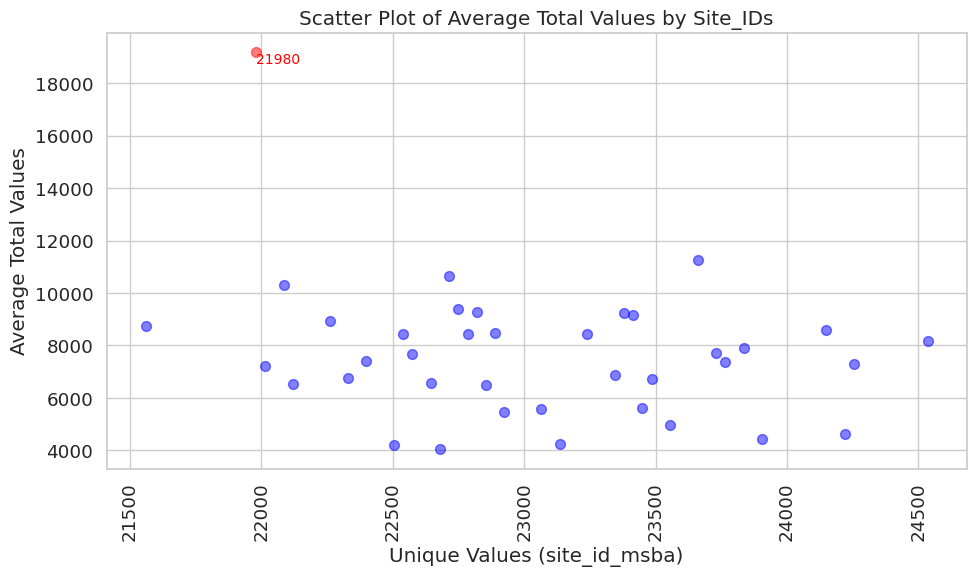

In [ ]:
# Total sales for each row by summing the sales columns
timeseries['total_value'] = timeseries[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].sum(axis=1)

# Grouping the data by the unique values in the 'site_id_msba' column
grouped = timeseries.groupby('site_id_msba')['total_value']

# Calculation of the average total sales for each unique value
average_values = grouped.mean()

# Sorting the unique values based on average total sales in descending order
sorted_values = average_values.sort_values(ascending=False)

# Calculate the Z-scores for each data point
z_scores = np.abs(stats.zscore(sorted_values))

# Set a Z-score threshold for highlighting outliers (e.g., Z-score > 2)
z_score_threshold = 2

# Identifying outliers
outliers = z_scores > z_score_threshold

# Scatter plot of the average total sales
plt.figure(figsize=(10, 6))

# Highlighting outliers in red and labeling them with site_id_msba values
for site_id, avg_total, outlier in zip(sorted_values.index, sorted_values.values, outliers):
    if outlier:
        plt.scatter(site_id, avg_total, marker='o', s=50, alpha=0.5, color='red')
        plt.text(site_id, avg_total, site_id, fontsize=10, ha='left', va='top', color='red')
    else:
        plt.scatter(site_id, avg_total, marker='o', s=50, alpha=0.5, color='blue')

plt.xlabel('Unique Values (site_id_msba)')
plt.ylabel('Average Total Values')
plt.title('Scatter Plot of Average Total Values by Site_IDs')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

It can be observed that, Store 21980 was identified as outlier in terms of average total values among all the 38 stores. One of the target variable was responsible for this outlier, which can be observed in the following scatter plot.

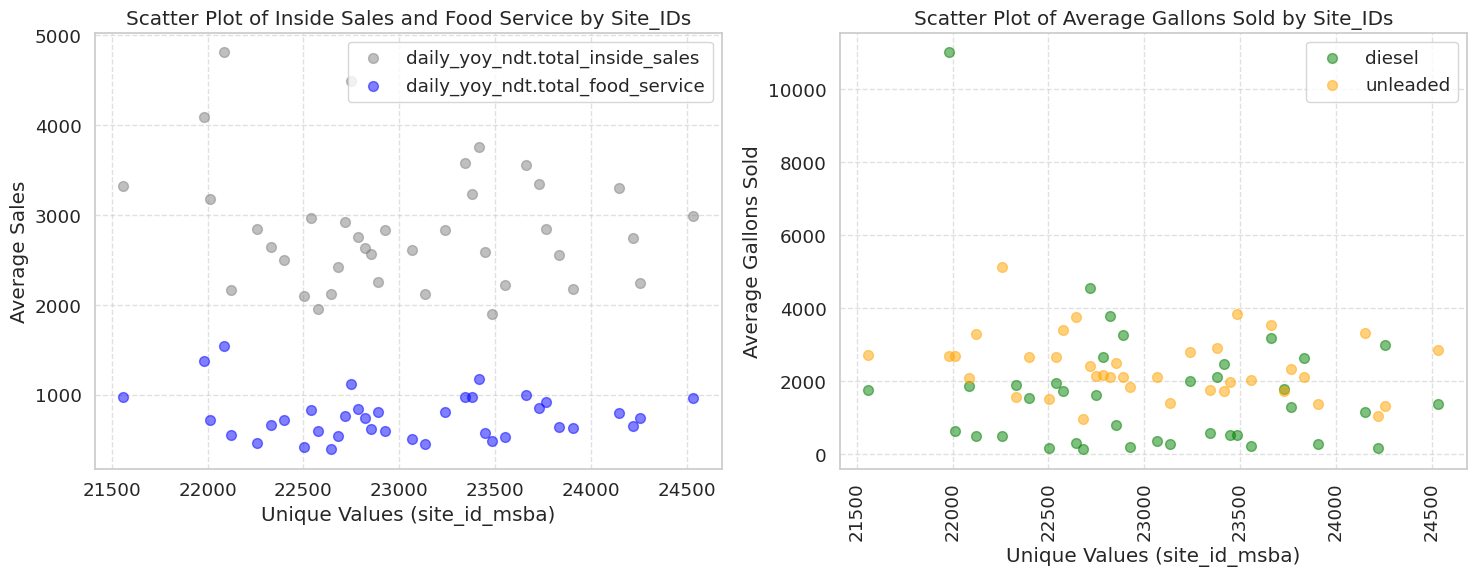

In [ ]:
# Grouping the data by the unique values in the 'site_id_msba' column
grouped = timeseries.groupby('site_id_msba')[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].mean()

# Calculate the Z-scores for each data point
z_scores = np.abs(stats.zscore(grouped))

# Set a Z-score threshold for highlighting outliers (e.g., Z-score > 2)
z_score_threshold = 2

# Identifying outliers
outliers = z_scores > z_score_threshold

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Inside Sales and Food Service
ax1 = axes[0]
sales_labels = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']
colors1 = ['grey', 'blue']

# Highlighting outliers in red
for i, label in enumerate(sales_labels):
    ax1.scatter(grouped.index, grouped[label], marker='o', s=50, alpha=0.5, color=colors1[i], label=label)

ax1.set_xlabel('Unique Values (site_id_msba)')
ax1.set_ylabel('Average Sales')
ax1.set_title('Scatter Plot of Inside Sales and Food Service by Site_IDs')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot for Diesel and Unleaded
ax2 = axes[1]
gallons_labels = ['diesel', 'unleaded']
colors2 = ['green', 'orange']

# Highlighting outliers in red
for i, label in enumerate(gallons_labels):
    ax2.scatter(grouped.index, grouped[label], marker='o', s=50, alpha=0.5, color=colors2[i], label=label)

ax2.set_xlabel('Unique Values (site_id_msba)')
ax2.set_ylabel('Average Gallons Sold')
ax2.set_title('Scatter Plot of Average Gallons Sold by Site_IDs')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In the two scatter plots shown above, an oultlier in the diesel category had a significant impact on store 21980, causing it to be an outlier in terms of total value.

#### Sales Over time

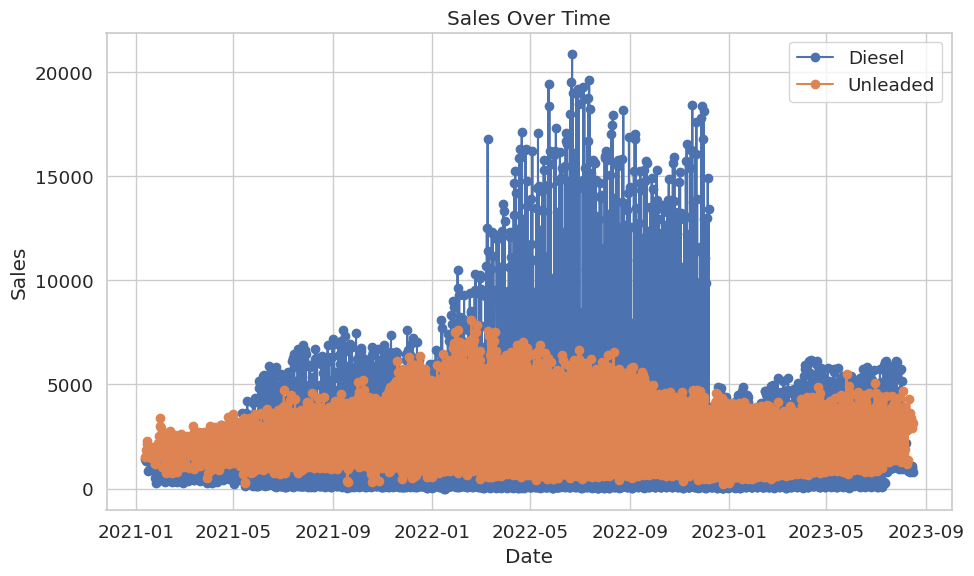

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot for multiple sales columns
plt.figure(figsize=(10, 6))

plt.plot(timeseries.index, timeseries['diesel'], label='Diesel', marker='o')
plt.plot(timeseries.index, timeseries['unleaded'], label='Unleaded', marker='o')

# Set the title and axis labels
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


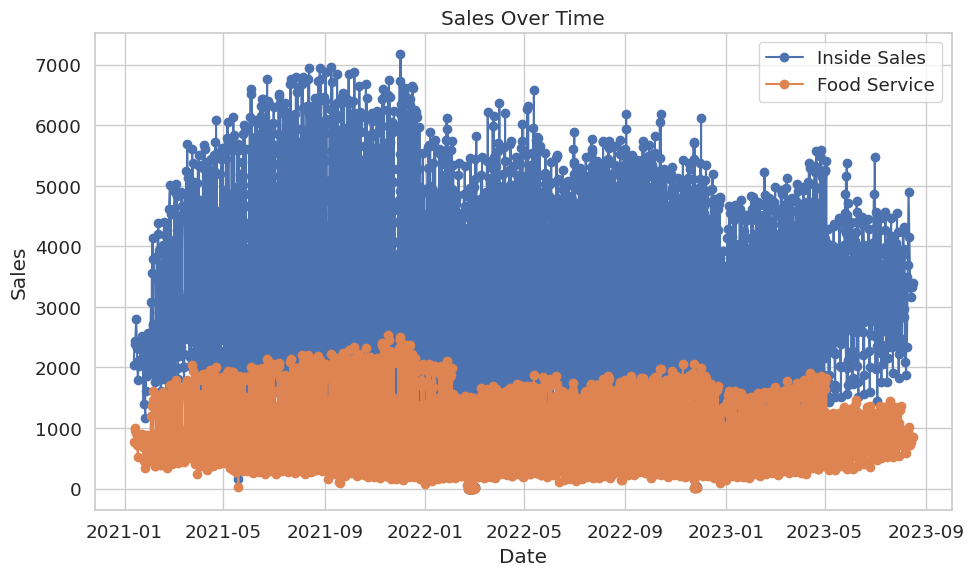

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot for multiple sales columns
plt.figure(figsize=(10, 6))

plt.plot(timeseries.index, timeseries['daily_yoy_ndt.total_inside_sales'], label='Inside Sales', marker='o')
plt.plot(timeseries.index, timeseries['daily_yoy_ndt.total_food_service'], label='Food Service', marker='o')

# Set the title and axis labels
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


The line plots above depict the trends in target sales. Here are the observed ranges for each category:

- Inside sales range from 0 to a maximum of 6,954.
- Food sales vary between 0 and 2,531.
- Diesel sales exhibit a wide range, spanning from 0 to a peak of 20,853.
- Unleaded sales range from 240 to 8,077.

Notably, Diesel sales experienced a significant surge in 2022, followed by a drastic drop in 2023. The underlying reasons for this fluctuation require further investigation.

Similarly, Unleaded sales exhibited a gradual improvement from January 2021 to March 2022, followed by a gradual decline extending until July 2023. The factors contributing to this pattern should be explored to gain a deeper understanding of the dynamics at play.

#### Weekly Average sales Patterns

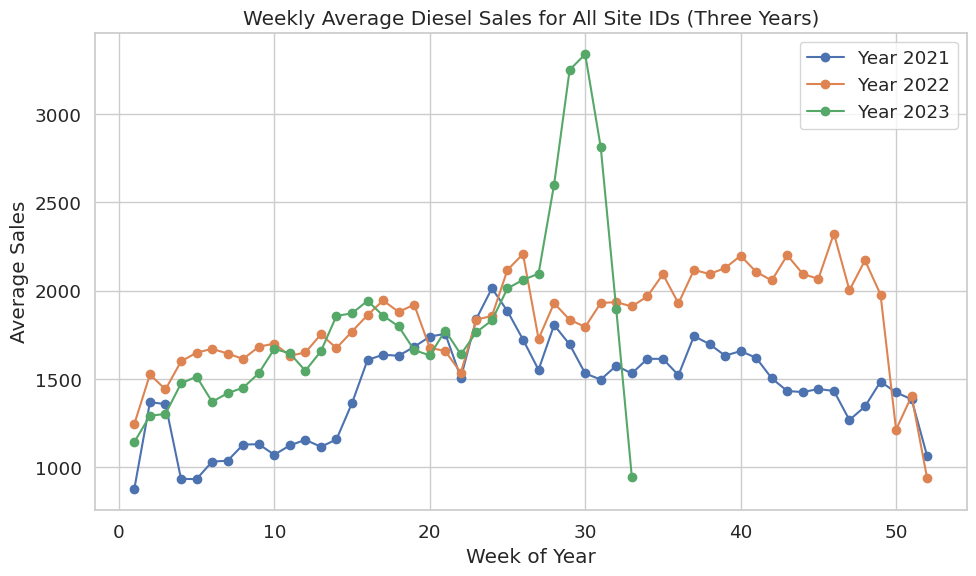

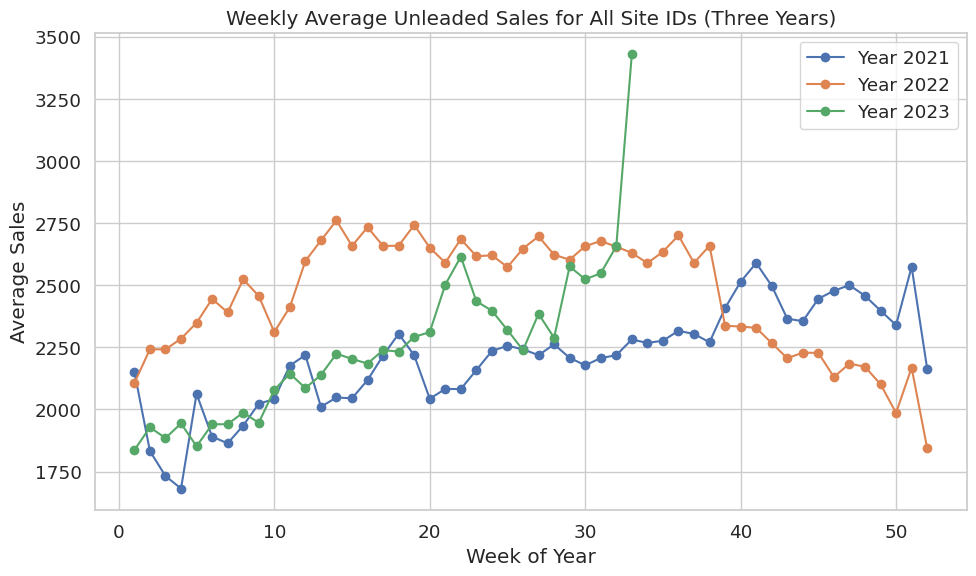

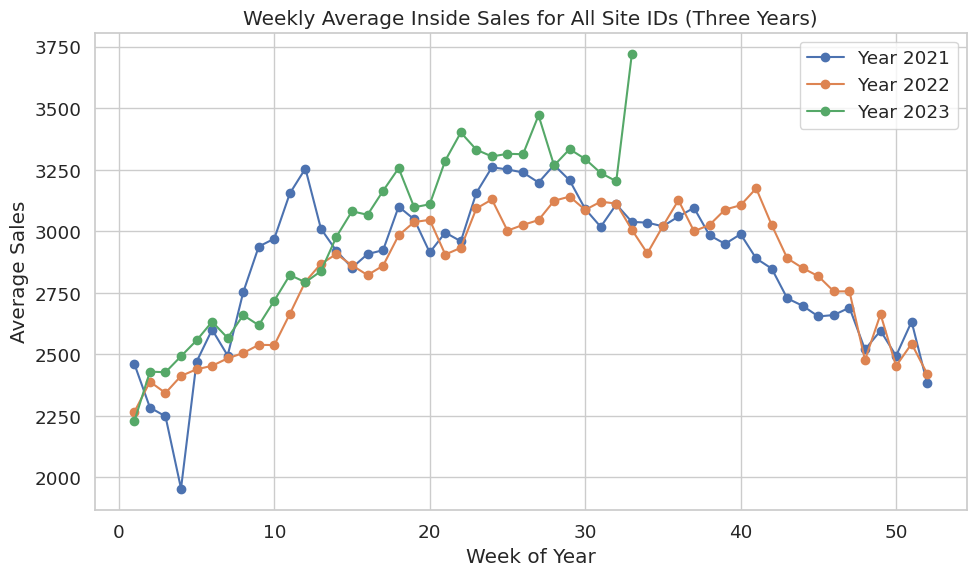

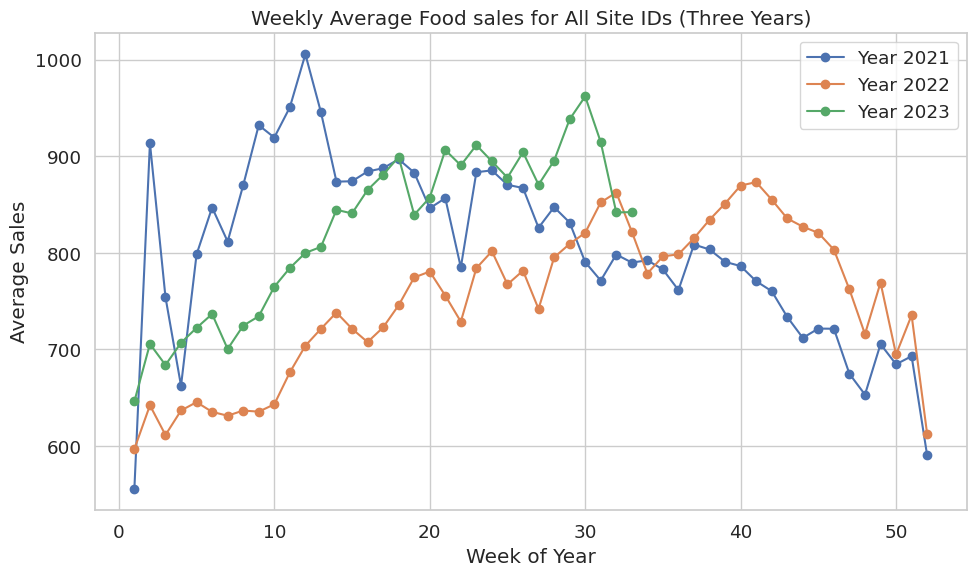

In [ ]:
import matplotlib.pyplot as plt

# Calculate daily average sales for each day of the year across all years
daily_avg_sales = timeseries.groupby(['Year', 'calendar.fiscal_week_id_for_year'])['diesel'].mean().reset_index()

# Create a line plot for Diesel Sales
plt.figure(figsize=(10, 6))
for year in daily_avg_sales['Year'].unique():
    data = daily_avg_sales[daily_avg_sales['Year'] == year]
    plt.plot(data['calendar.fiscal_week_id_for_year'], data['diesel'], label=f'Year {year}', marker='o')

# Set the title and axis labels
plt.title('Weekly Average Diesel Sales for All Site IDs (Three Years)')
plt.xlabel('Week of Year')
plt.ylabel('Average Sales')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



# Calculate daily average sales for each day of the year across all years
daily_avg_sales = timeseries.groupby(['Year', 'calendar.fiscal_week_id_for_year'])['unleaded'].mean().reset_index()

# Create a line plot for Diesel Sales
plt.figure(figsize=(10, 6))
for year in daily_avg_sales['Year'].unique():
    data = daily_avg_sales[daily_avg_sales['Year'] == year]
    plt.plot(data['calendar.fiscal_week_id_for_year'], data['unleaded'], label=f'Year {year}', marker='o')

# Set the title and axis labels
plt.title('Weekly Average Unleaded Sales for All Site IDs (Three Years)')
plt.xlabel('Week of Year')
plt.ylabel('Average Sales')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate daily average sales for each day of the year across all years
daily_avg_sales = timeseries.groupby(['Year', 'calendar.fiscal_week_id_for_year'])['daily_yoy_ndt.total_inside_sales'].mean().reset_index()

# Create a line plot for Diesel Sales
plt.figure(figsize=(10, 6))
for year in daily_avg_sales['Year'].unique():
    data = daily_avg_sales[daily_avg_sales['Year'] == year]
    plt.plot(data['calendar.fiscal_week_id_for_year'], data['daily_yoy_ndt.total_inside_sales'], label=f'Year {year}', marker='o')

# Set the title and axis labels
plt.title('Weekly Average Inside Sales for All Site IDs (Three Years)')
plt.xlabel('Week of Year')
plt.ylabel('Average Sales')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate daily average sales for each day of the year across all years
daily_avg_sales = timeseries.groupby(['Year', 'calendar.fiscal_week_id_for_year'])['daily_yoy_ndt.total_food_service'].mean().reset_index()

# Create a line plot for Diesel Sales
plt.figure(figsize=(10, 6))
for year in daily_avg_sales['Year'].unique():
    data = daily_avg_sales[daily_avg_sales['Year'] == year]
    plt.plot(data['calendar.fiscal_week_id_for_year'], data['daily_yoy_ndt.total_food_service'], label=f'Year {year}', marker='o')

# Set the title and axis labels
plt.title('Weekly Average Food sales for All Site IDs (Three Years)')
plt.xlabel('Week of Year')
plt.ylabel('Average Sales')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


The four charts represent the weekly average of sales over a span of 52 weeks for three different years across various site locations. A common trend observed in all the charts, except for food services, is a gradual increase in sales from week 1 to week 26, followed by a subsequent decline

**Diesel Sales:**
- In 2023, there's a noticeable and abrupt surge in Diesel Sales during weeks 27 to 30, followed by a steep decline from week 30 to 33. This sudden change warrants a thorough investigation to identify the root causes. It's essential to understand whether external factors, market dynamics, or specific events triggered this pattern.
- In contrast, during 2021 and 2022, Diesel Sales exhibit a more predictable trend. They steadily increase, reaching a plateau for a few weeks, and then gradually decrease towards week 52. The stability in these years suggests that the market might have been less volatile during those periods.

**Unleaded Sales:**
- Similar to Diesel Sales, Unleaded Sales in 2023 experience a remarkable spike in weeks 32 to 33. The reasons behind this sudden increase should be explored to determine whether they are related to changes in consumer behavior, marketing strategies, or other external factors.
- In 2021 and 2022, the pattern for Unleaded Sales resembles a steady increase, followed by periods of stability (plateau), and ultimately a decline towards week 52. Understanding why this pattern repeats annually is crucial for making informed business decisions.

**Food Sales:**
- In 2023, Food Sales start with a strong performance in the first 10 weeks but gradually decline from week 12 to week 52. The factors contributing to this decline require thorough investigation. It's essential to determine if changes in consumer preferences, competition, or operational issues are influencing this trend.
- In both 2021 and 2022, Food Sales follow a similar trajectory: a gradual increase, followed by periods of stability, and eventual decline towards week 52. Analyzing whether this is a seasonal trend or related to specific marketing strategies is essential.

**Inside Sales:**
- In 2023, Inside Sales exhibit a sudden spike in weeks 32 to 33, similar to Unleaded Sales. Understanding what drives this spike is crucial for optimizing sales strategies. Examining whether it's tied to promotions, product launches, or external factors is essential.
- In 2021 and 2022, Inside Sales also follow a pattern of gradual increase, plateau, and decline towards week 52. Investigating whether this is a consistent seasonal pattern or influenced by other variables will provide valuable insights.

In summary, while the general trend across the years for all sales categories includes a gradual increase followed by a decline, the anomalies observed in 2023, such as sudden spikes and drops, demand a deeper analysis. Identifying the reasons behind these deviations is vital for making informed decisions, adjusting strategies, and responding effectively to changing market dynamics.

#### **Sales By Days**

                      avg_inside_sales  avg_food_service  avg_g_diesel  \
calendar.day_of_week                                                     
Friday                     3366.582282        882.491871   1845.983033   
Monday                     2780.556207        777.692956   1894.728744   
Saturday                   2756.193378        640.616270   1147.532033   
Sunday                     2247.810004        509.612523   1009.676778   
Thursday                   3066.268194        867.351256   1986.431140   
Tuesday                    2802.265570        806.664158   1987.379094   
Wednesday                  2905.310778        832.643233   2034.600464   

                      avg_g_unleaded  
calendar.day_of_week                  
Friday                   2794.113315  
Monday                   2383.800690  
Saturday                 2363.678907  
Sunday                   2033.416496  
Thursday                 2471.164486  
Tuesday                  2294.119326  
Wednesday            

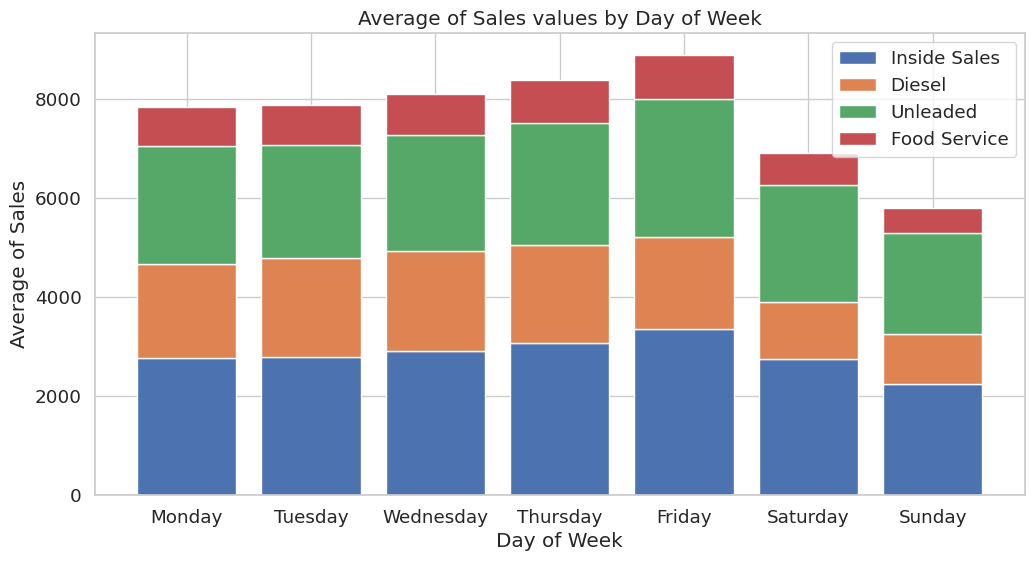

In [ ]:
avg_sale_day = timeseries.groupby('calendar.day_of_week').agg(
    avg_inside_sales =("daily_yoy_ndt.total_inside_sales", "mean"),
    avg_food_service =("daily_yoy_ndt.total_food_service", "mean"),
    avg_g_diesel =("diesel", "mean"),
    avg_g_unleaded =("unleaded", "mean"))

print(avg_sale_day)


ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_sale_day = avg_sale_day.reindex(ordered_days)


# Get the day of week labels
avg_sale_day_labels = avg_sale_day.index.to_list()

plt.figure(figsize=(12,6))
plt.bar(avg_sale_day_labels, avg_sale_day['avg_inside_sales'], label='Inside Sales')
plt.bar(avg_sale_day_labels, avg_sale_day['avg_g_diesel'], bottom=avg_sale_day['avg_inside_sales'], label='Diesel')
plt.bar(avg_sale_day_labels, avg_sale_day['avg_g_unleaded'], bottom=avg_sale_day['avg_g_diesel'] + avg_sale_day['avg_inside_sales'], label='Unleaded')
plt.bar(avg_sale_day_labels, avg_sale_day['avg_food_service'], bottom=avg_sale_day['avg_g_unleaded'] + avg_sale_day['avg_g_diesel'] + avg_sale_day['avg_inside_sales'], label='Food Service')

#plot clean up
plt.xlabel('Day of Week')
plt.ylabel('Average of Sales')
plt.title('Average of Sales values by Day of Week')
plt.legend(loc='upper right')
plt.show()

This table shows the average inside sales, average gasoline sales in gallons, and average food service sales for each day of the week. The average inside sales are highest on Fridays and lowest on Sundays. The average gasoline sales are highest on Mondays and lowest on Sundays. The average food service sales are highest on Fridays and lowest on Sundays.


#### **Weekend vs Weekdays Sales**

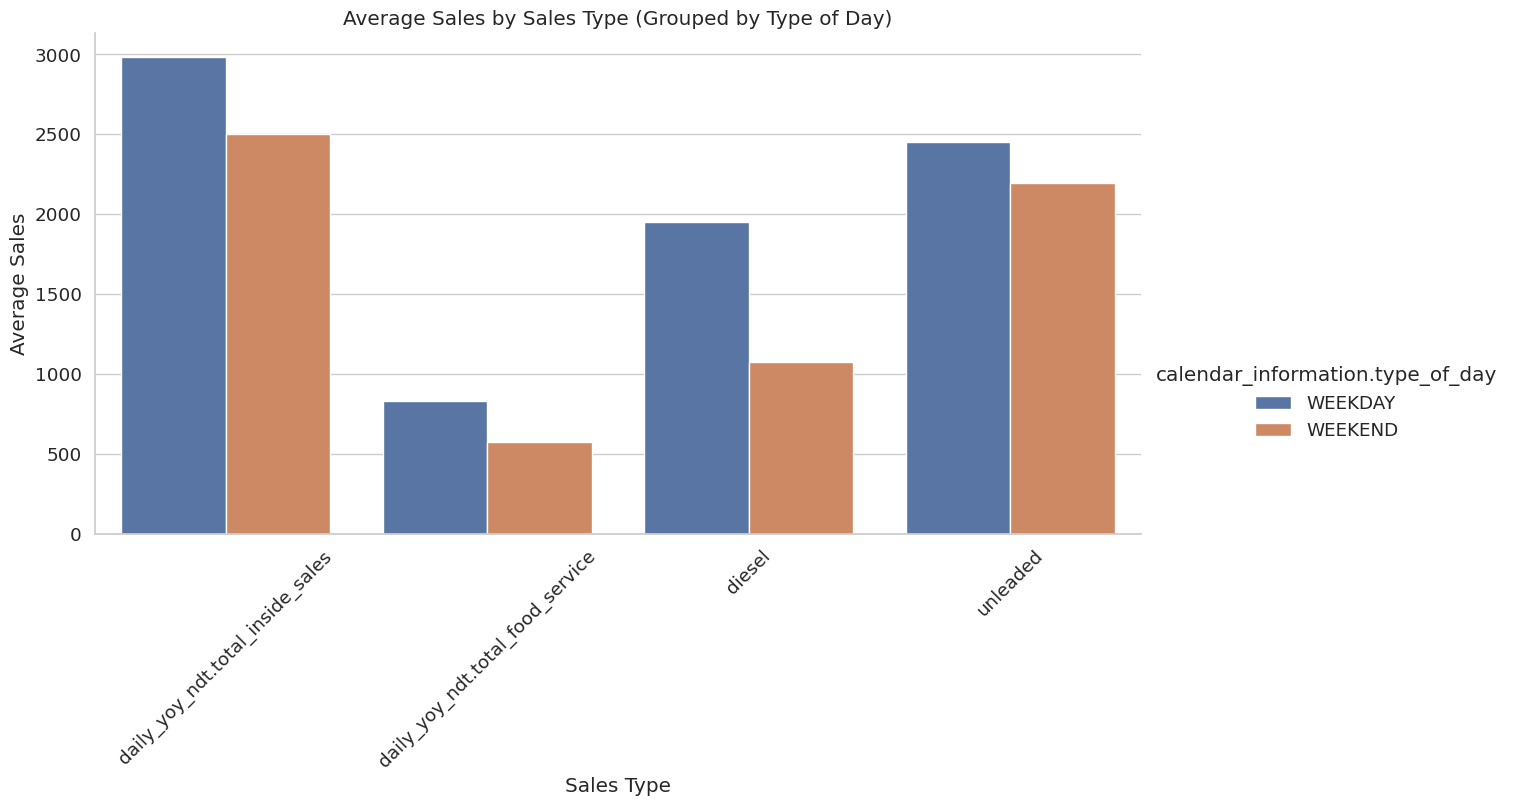

In [ ]:
# Melt the DataFrame to long format for easier plotting
melted_df = timeseries.melt(id_vars=['calendar_information.type_of_day', 'calendar.day_of_week'],
                    value_vars=['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded'],
                    var_name='SalesType', value_name='SalesValue')

# Create separate plots for type_of_day
g = sns.catplot(data=melted_df, x='SalesType', y='SalesValue',hue='calendar_information.type_of_day', kind='bar', ci=None, height=6, aspect=2)
g.set_axis_labels('Sales Type', 'Average Sales')
g.set(title='Average Sales by Sales Type (Grouped by Type of Day)')
plt.xticks(rotation=45)
# plt.legend(title='Type of Day', title_fontsize='14')
plt.show()


The plot above illustrates the average sales for weekdays and weekends across all target sales. Notably, the average sales during weekdays consistently outperform those on weekends for all target sales. Specifically, weekday Diesel sales are nearly twice as high as weekend sales.

#### **Sales by Season**

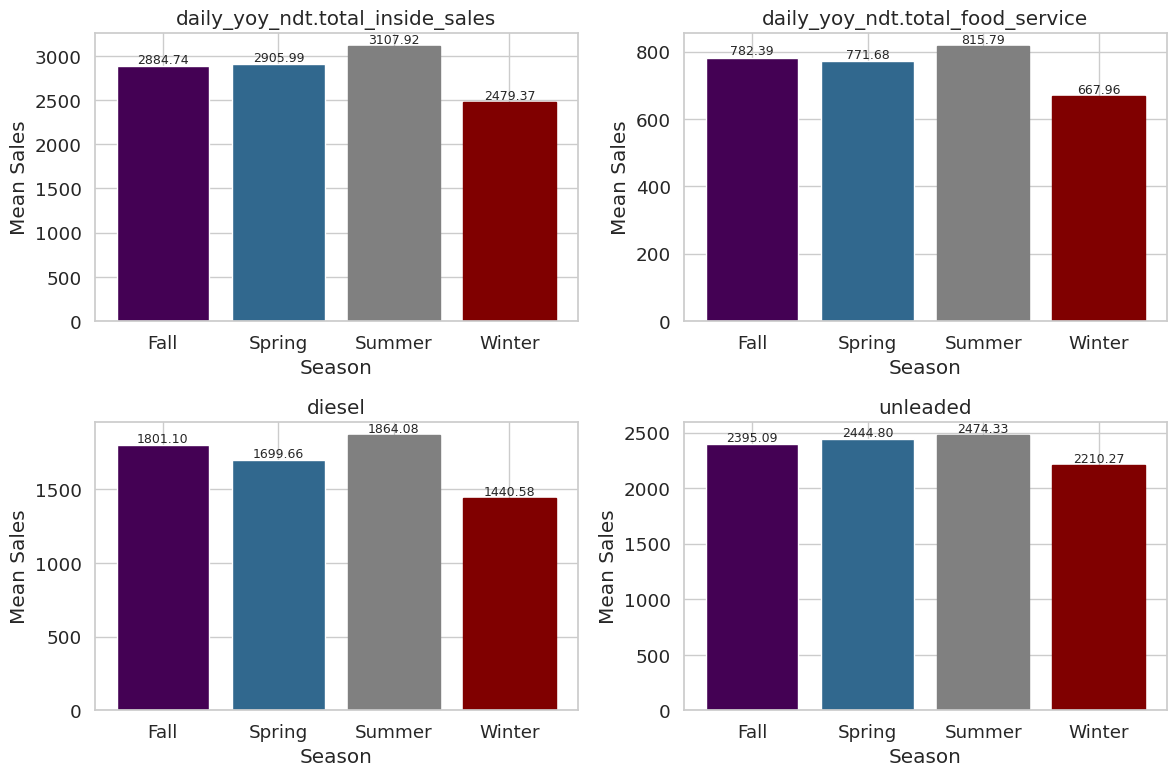

In [ ]:
# List of target variables
target_var = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']

tallest_clusters = {}

plt.figure(figsize=(12, 8))

for i, target_variable in enumerate(target_var):
    plt.subplot(2, 2, i + 1)
    ax = plt.gca()

    # Grouping the data by season and calculate the mean sales for each season
    grouped_data = timeseries.groupby(['season'])[target_variable].mean()

    # Finding the highest and lowest values
    highest_season = grouped_data.idxmax()
    lowest_season = grouped_data.idxmin()

    tallest_clusters[target_variable] = highest_season

    # Creating a custom color map ranging from grey to maroon
    cmap = plt.cm.get_cmap('viridis', len(grouped_data))
    colors = cmap(range(len(grouped_data)))

    # Creating a bar plot with custom colors
    x = np.arange(len(grouped_data))
    bars = plt.bar(x, grouped_data, color=colors)

    # Coloring the bars for highest and lowest values
    bars[x[grouped_data.index == highest_season][0]].set_color('grey')
    bars[x[grouped_data.index == lowest_season][0]].set_color('maroon')

    for bar, value in zip(bars, grouped_data):
        plt.text(bar.get_x() + bar.get_width()/2, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

    plt.title(target_variable)
    plt.xlabel('Season')
    plt.ylabel('Mean Sales')
    plt.xticks(x, grouped_data.index)

plt.tight_layout()
plt.show()

The season plot above tells us that the target sales are evenly distributed by season. We see consistent low sales in winter for inside sales, food service, diesel and unleaded which is within 21-23%. The inside and unleaded sales are slightly higher in spring than our fall sales.

*   Highest: Summer  
*   Lowest : Winter

*   Spring:
the inside and unleaded sales are slightly higher than our fall sales.

* Fall:
Food service and diesel sales are slightly higher in fall.


#### Monthly Sales Distribution

In [ ]:
timeseries[['Month','diesel', 'unleaded','daily_yoy_ndt.total_food_service','daily_yoy_ndt.total_inside_sales']].groupby('Month').agg({'diesel':['min','mean','max'],'unleaded':['min','mean','max'],'daily_yoy_ndt.total_inside_sales':['min','mean','max'], 'daily_yoy_ndt.total_food_service':['min','mean', 'max']})

diesel                           unleaded                          \
           min         mean         max       min         mean        max   
Month                                                                       
1       0.0000  1421.897759   8995.5320  270.7425  2126.609767  7522.7355   
2      38.5105  1532.424074  10491.4705  469.7455  2253.742180  8077.2335   
3      34.7235  1641.627868  16807.7070  460.5195  2350.197651  7541.0895   
4      12.4985  1761.140178  17117.4185  530.0855  2495.593810  7046.4800   
5      28.9415  1698.356854  19405.7955  278.5370  2490.208546  6897.5375   
6      54.6175  1956.197743  20853.9520  501.5675  2466.486906  6415.0415   
7      20.0830  1823.119042  19618.8055  468.8670  2491.195441  6631.9540   
8      32.5605  1815.885205  18172.1680  398.4715  2465.055987  6570.6935   
9      31.0625  1905.036392  17041.3565  300.0410  2477.374024  5825.3090   
10     51.6775  1792.115625  15912.2075  297.1430  2368.184671  5191.1860   
11     15.5680  1706.428874  18434.0625  366.7685  2340.565521  6128.2795   
12     14.2625  1376.431557  18136.0970  240.1805  2254.662599  6359.6680   

      daily_yoy_ndt.total_inside_sales                          \
                                   min         mean        max   
Month                                                            
1                             621.9675  2367.423785  6127.3450   
2                               0.0000  2536.521936  5742.5970   
3                               1.4350  2770.487707  6218.7195   
4                            1002.6240  2944.823748  6367.5115   
5                             165.7285  3003.684884  6579.7865   
6                             870.6390  3147.579068  6756.1165   
7                             903.6545  3153.351984  6794.9490   
8                             767.9350  3024.097328  6953.0090   
9                             449.0150  3065.557971  6954.1990   
10                            555.7405  2917.805767  6872.1520   
11                             16.7545  2669.817325  6755.1715   
12                            524.1810  2539.679306  7172.4660   

      daily_yoy_ndt.total_food_service                         
                                   min        mean        max  
Month                                                          
1                              69.3560  642.086242  2109.1910  
2                               0.0000  679.738076  1997.9330  
3                               0.0000  740.925361  2036.1390  
4                             195.8215  781.146362  2010.1165  
5                              32.9770  793.212617  1939.4165  
6                             100.7930  829.796472  2145.4475  
7                             120.4455  811.187591  2133.5020  
8                             142.8700  806.821880  2208.2690  
9                              92.2635  817.643461  2294.6805  
10                            174.7760  794.607001  2331.8575  
11                              1.1795  734.535376  2531.6620  
12                             93.2890  683.190961  2506.9485

Some key observations from the data include:  
**Diesel**
* Average diesel in gallons sold is highest in *June* and lowest in December followed by January.
* Range of diesel sales is highest in *June* and lowest in January.

**Unleaded**
* Average unleaded gallons sold is highest in *April* and lowest in January.
* Range of unleaded sales is highest in *February* and lowest in December.

**Food Service**
* Average food service sales are highest in *June* and lowest in January.
* Range of food service sales is highest in *November* and lowest in February.

**Inside Sales**
* Average inside sales are highest in *July* and lowest in January.
* Range of inside sales is highest in *December* and lowest in February with 0 sale.

Overall, the data suggests that sales of diesel and food service is highest in June and lowest in December January. Unleaded is highest in April, inside sales highest in July, while January is lowest for both products. This suggests that there is more variation in sales in the spring than in the winter.



#### Holiday Sales Distribution

                              holiday_inside_sales  holiday_diesel_gallons  \
calendar_information.holiday                                                 
All Saint's Day                        2763.397461             2013.822355   
Ascension                              3330.209200             1974.918100   
Christmas Day                          2578.134171              313.806224   
Christmas Eve                          2360.981276              571.188303   
Columbus Day                           2934.279711             2076.533237   
Easter                                 2279.016203              999.590068   
Father's Day                           2495.160592             1223.395803   
Flag Day                               3122.260526             2215.815808   
Good Friday                            3385.759149             1782.902459   
Halloween Day                          2345.099658             1421.973184   
Independence Day                       2638.234605              

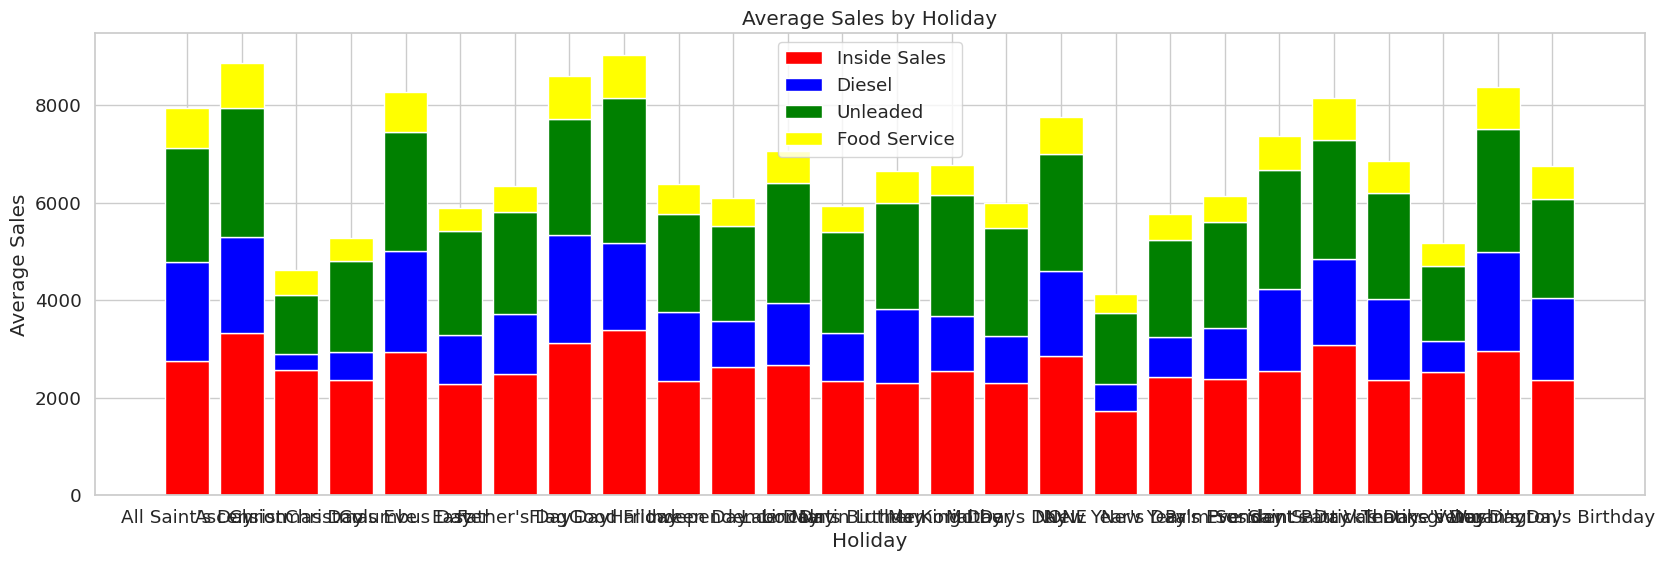

In [ ]:
avg_sale_holiday = timeseries.groupby('calendar_information.holiday').agg(
    holiday_inside_sales=("daily_yoy_ndt.total_inside_sales", "mean"),
    holiday_diesel_gallons=("diesel", "mean"),
    holiday_gallons_unleaded=("unleaded", "mean"),
    holiday_food_service=("daily_yoy_ndt.total_food_service", "mean")
)
print(avg_sale_holiday)

# Get the holiday labels
holiday_labels = avg_sale_holiday.index.to_list()

# Create the bar chart
plt.figure(figsize=(20,6))
plt.bar(holiday_labels, avg_sale_holiday['holiday_inside_sales'], label='Inside Sales', color='red')
plt.bar(holiday_labels, avg_sale_holiday['holiday_diesel_gallons'], bottom=avg_sale_holiday['holiday_inside_sales'], label='Diesel', color='blue')
plt.bar(holiday_labels, avg_sale_holiday['holiday_gallons_unleaded'], bottom=avg_sale_holiday['holiday_diesel_gallons'] + avg_sale_holiday['holiday_inside_sales'], label='Unleaded', color='green')
plt.bar(holiday_labels, avg_sale_holiday['holiday_food_service'], bottom=avg_sale_holiday['holiday_gallons_unleaded'] + avg_sale_holiday['holiday_diesel_gallons'] + avg_sale_holiday['holiday_inside_sales'], label='Food Service', color='yellow')

# Add labels and title to the plot
plt.xlabel('Holiday')
plt.ylabel('Average Sales')
plt.title('Average Sales by Holiday')

# Show the plot
plt.legend(loc='upper center')
plt.show()


* **Average sales are generally higher on holidays than on non-holidays.** This
is likely due to the fact that people are more likely to spend money on holidays.  
* **The average sales for inside sales are generally higher than the average sales for other sales categories.** This may be because people are more likely to buy items from inside stores on holidays, when they are looking for a specific item or want to be able to return or exchange their purchase easily.  
* **The average sales for Christmas and Thanksgiving are the highest for all sales categories.** This is likely due to the fact that these are two of the biggest holidays in the United States.  
* **The average sales for New Year's Day and New Year's Eve are the lowest for all sales categories.** This may be because people are more likely to be focused on celebrating with friends and family on these holidays, rather than shopping.  

*This result will help us determine how to weigh the sales for holidays vs on regular days.*

# <a name = "SFD"> Store Features Dataset </a>

##<a name = "DO2"> Data Overview</a>

In [ ]:
store_features.info()
display(store_features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   open_year                                37 non-null     int64 
 1   square_feet                              37 non-null     int64 
 2   front_door_count                         37 non-null     int64 
 3   years_since_last_project                 37 non-null     int64 
 4   parking_spaces                           37 non-null     int64 
 5   lottery                                  37 non-null     object
 6   freal                                    37 non-null     object
 7   bonfire_grill                            37 non-null     object
 8   pizza                                    37 non-null     object
 9   cinnabon                                 37 non-null     object
 10  godfather_s_pizza                        37 non-null     object


open_year  square_feet  front_door_count  years_since_last_project  \
0       2021         5046                 2                         2   
1       2021         5046                 2                         2   
2       2021         5046                 2                         2   
3       2021         5046                 2                         2   
4       2021         5046                 2                         2   

   parking_spaces lottery freal bonfire_grill pizza cinnabon  ...  \
0              38     Yes   Yes           Yes    No       No  ...   
1              39      No   Yes           Yes   Yes       No  ...   
2              35     Yes   Yes           Yes   Yes       No  ...   
3              36      No   Yes           Yes   Yes       No  ...   
4              25     Yes   Yes           Yes    No       No  ...   

  rv_lanes_fueling_positions_2 hi_flow_rv_lanes_layout  \
0                            6                   Stack   
1                            4                   Combo   
2                            5                 In-Line   
3                            4                   Combo   
4                            0                     NaN   

  hi_flow_rv_lanes_stack_type non_24_hour self_check_out mens_toilet_count  \
0                       HF/RV          No            Yes                 2   
1                       HF/RV          No            Yes                 5   
2                        None          No            Yes                 3   
3                       HF/RV          No            Yes                 3   
4                         NaN          No            Yes                 0   

  mens_urinal_count womens_toilet_count womens_sink_count site_id_msba  
0                 2                   6                 2        21560  
1                 5                  10                 4        21980  
2                 2                   4                 1        22015  
3                 3                   6                 2        22085  
4                 0                   0                 0        22120  

[5 rows x 54 columns]

Starting position of store_features dataset -- 55columns, 37 rows. dtypes: int64(28), object(27).  

We removed the first column that was not assigned any name. It does contain only serial numbers and hence removed.

In [ ]:
#dropping column
store_features.drop(columns='Unnamed: 0', inplace=True)
store_features.head()

KeyError: ignored

In [ ]:
#descriptive analysis of the dataset
store_features.describe()


open_year  square_feet  front_door_count  years_since_last_project  \
count    37.000000     37.00000              37.0                 37.000000   
mean   2021.324324   4970.27027               2.0                  1.648649   
std       0.474579    575.93121               0.0                  0.483978   
min    2021.000000   2933.00000               2.0                  1.000000   
25%    2021.000000   5046.00000               2.0                  1.000000   
50%    2021.000000   5046.00000               2.0                  2.000000   
75%    2022.000000   5046.00000               2.0                  2.000000   
max    2022.000000   6134.00000               2.0                  2.000000   

       parking_spaces   x1_mile_pop   x1_mile_emp  x1_mile_income  \
count       37.000000     37.000000     37.000000       37.000000   
mean        37.405405   6703.567568   4757.648649    53300.378378   
std          5.918237   5694.011350   4697.168291    24333.027254   
min         23.000000      0.000000     56.000000        0.000000   
25%         34.000000   1984.000000   1771.000000    39538.000000   
50%         38.000000   5574.000000   3895.000000    46356.000000   
75%         41.000000  11269.000000   6002.000000    73519.000000   
max         49.000000  18692.000000  26077.000000   110957.000000   

       x1_2_mile_pop  x1_2_mile_emp  ...  \
count      37.000000      37.000000  ...   
mean     1833.108108    1514.135135  ...   
std      1915.140476    2489.423094  ...   
min         0.000000      31.000000  ...   
25%       262.000000     386.000000  ...   
50%      1003.000000    1037.000000  ...   
75%      2686.000000    1616.000000  ...   
max      5923.000000   15403.000000  ...   

       traditional_forecourt_fueling_positions  rv_lanes_fueling_positions  \
count                                37.000000                   37.000000   
mean                                 14.270270                    2.513514   
std                                   3.948619                    2.049683   
min                                  10.000000                    0.000000   
25%                                  12.000000                    0.000000   
50%                                  12.000000                    4.000000   
75%                                  16.000000                    4.000000   
max                                  24.000000                    6.000000   

       hi_flow_lanes_fueling_positions  hi_flow_lanes_fueling_positions_2  \
count                        37.000000                          37.000000   
mean                          3.324324                           3.324324   
std                           2.925501                           2.925501   
min                           0.000000                           0.000000   
25%                           0.000000                           0.000000   
50%                           5.000000                           5.000000   
75%                           5.000000                           5.000000   
max                           9.000000                           9.000000   

       rv_lanes_fueling_positions_2  mens_toilet_count  mens_urinal_count  \
count                     37.000000          37.000000          37.000000   
mean                       2.513514           2.378378           2.351351   
std                        2.049683           0.923500           0.856875   
min                        0.000000           0.000000           0.000000   
25%                        0.000000           2.000000           2.000000   
50%                        4.000000           2.000000           2.000000   
75%                        4.000000           3.000000           3.000000   
max                        6.000000           5.000000           5.000000   

       womens_toilet_count  womens_sink_count  site_id_msba  
count            37.000000          37.000000     37.000000  
mean              4.648649           1.702703  23040.405405  
s

This shows us descriptive stats for our numerical columns. Overall, all of our stores have 2 front doors. We will utilize this output as we move to the next step in analysis.
Also, it shows us unique values for our dataset which is useful for data cleaning and feature engineering as needed. This helps us understand the diversity of the data and identify any columns with a small number of unique values. We closely analyze categorical columns to ensure that we don't overlook any values before factorizing.

##<a name = "DC2"> Data Cleaning</a>

In [ ]:
#Shows us null values
store_features.isnull().sum()

open_year                                   0
square_feet                                 0
front_door_count                            0
years_since_last_project                    0
parking_spaces                              0
lottery                                     0
freal                                       0
bonfire_grill                               0
pizza                                       0
cinnabon                                    0
godfather_s_pizza                           0
ethanol_free                                0
diesel                                      0
hi_flow_lanes                               0
rv_lanes                                    0
hi_flow_rv_lanes                            0
def                                         0
cat_scales                                  0
car_wash                                    0
ev_charging                                 0
rv_dumps                                    0
propane                           

There are 6 columns with null values between 14-15 total. We will try to understand this values and replace/feature engineer as needed.

### Unique Values count

In [ ]:
store_features.nunique()

open_year                                   2
square_feet                                 9
front_door_count                            1
years_since_last_project                    2
parking_spaces                             21
lottery                                     2
freal                                       2
bonfire_grill                               2
pizza                                       2
cinnabon                                    2
godfather_s_pizza                           1
ethanol_free                                2
diesel                                      1
hi_flow_lanes                               2
rv_lanes                                    2
hi_flow_rv_lanes                            2
def                                         2
cat_scales                                  2
car_wash                                    1
ev_charging                                 1
rv_dumps                                    2
propane                           

### Identical Columns

In [ ]:
# Step 1: Identify Identical Columns
identical_columns = []
for col1 in store_features.columns:
    for col2 in store_features.columns:
        if col1 != col2 and store_features[col1].equals(store_features[col2]):
            identical_columns.append(col1)

##<a name = "DA2"> Data Analysis- Store Features</a>

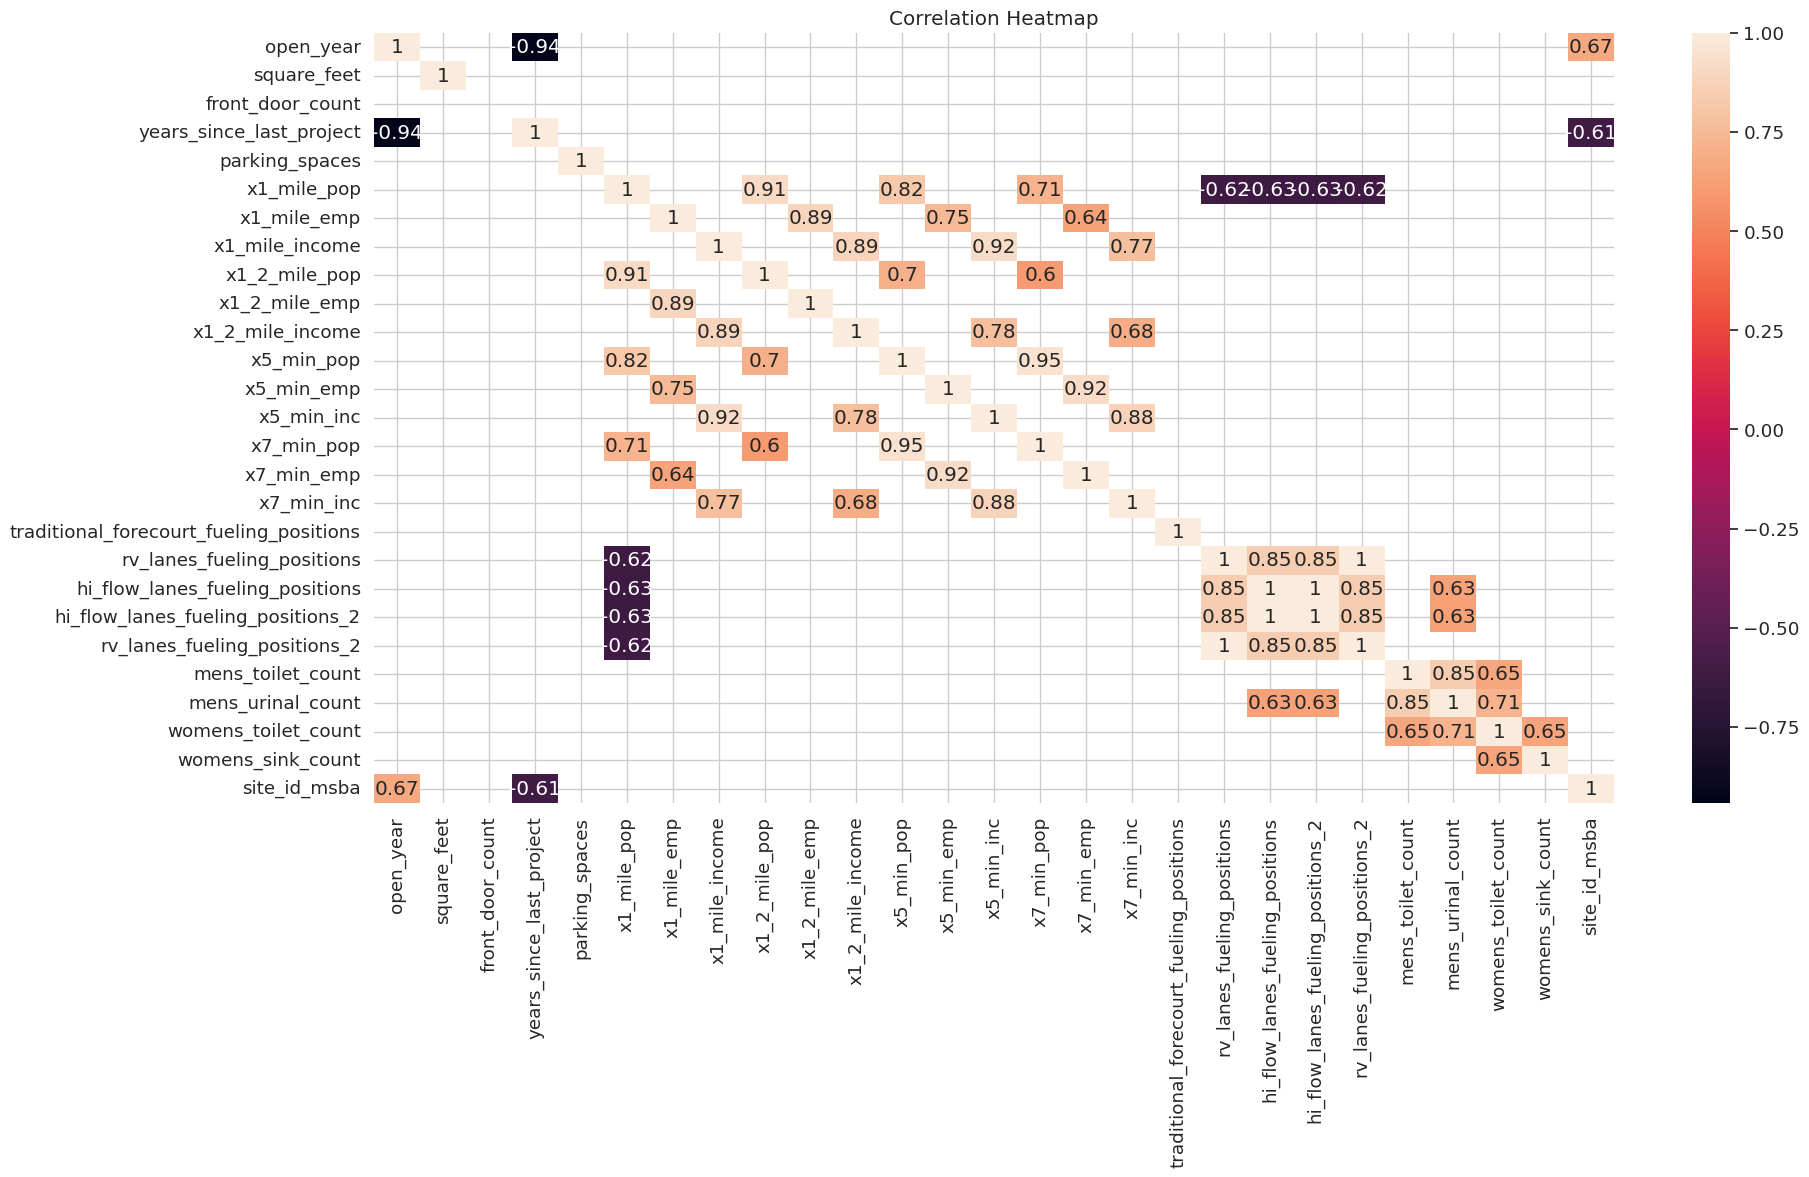

In [ ]:
#correlation between
corr_matrix = store_features.corr()
filtered_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.6]

#correlation map
plt.figure(figsize = (20,10))
sns.heatmap(filtered_corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

This plot only shows a correlation higher than 0.6 in our store features dataset. Our highest positive correlation is among population within certain radius, income of the population, and workplace employees. Another leading positive correlation is gasoline lanes, positions, and toilet counts. Negative correlation is between lanes and population in certain radius.
We will be utilizing this findings when examining merged datasets.

#<a name = "MD"> Merged Dataset </a>

##<a name = "DO3"> Data Overview</a>

In [ ]:
#Merge dataset
bonfire = timeseries.merge(store_features, on='site_id_msba', how='outer')

#Top 5 rows of data overview
bonfire.head()

capital_projects.soft_opening_date  calendar.fiscal_week_id_for_year  \
0                         2021-01-12                                 2   
1                         2021-01-12                                 2   
2                         2021-01-12                                 2   
3                         2021-01-12                                 3   
4                         2021-01-12                                 3   

  calendar.day_of_week calendar_information.holiday  \
0              Tuesday                         NONE   
1            Wednesday                         NONE   
2             Thursday                         NONE   
3               Friday                         NONE   
4             Saturday                         NONE   

  calendar_information.type_of_day  daily_yoy_ndt.total_inside_sales  \
0                          WEEKDAY                         2036.2685   
1                          WEEKDAY                         2379.8880   
2                          WEEKDAY                         2435.8600   
3                          WEEKDAY                         2805.9780   
4                          WEEKEND                         2314.7635   

   daily_yoy_ndt.total_food_service   diesel_x   unleaded  site_id_msba  ...  \
0                          762.8530  1424.1850  1522.0030         21560  ...   
1                         1003.7930  1303.8445  1853.7715         21560  ...   
2                          974.2250  1375.6785  2122.4070         21560  ...   
3                          911.0115  1334.9175  2267.9930         21560  ...   
4                          715.7535   831.1625  1819.6395         21560  ...   

   hi_flow_lanes_fueling_positions_2  rv_lanes_fueling_positions_2  \
0                                4.0                           6.0   
1                                4.0                           6.0   
2                                4.0                           6.0   
3                                4.0                           6.0   
4                                4.0                           6.0   

   hi_flow_rv_lanes_layout  hi_flow_rv_lanes_stack_type non_24_hour  \
0                    Stack                        HF/RV          No   
1                    Stack                        HF/RV          No   
2                    Stack                        HF/RV          No   
3                    Stack                        HF/RV          No   
4                    Stack                        HF/RV          No   

   self_check_out  mens_toilet_count  mens_urinal_count  womens_toilet_count  \
0             Yes                2.0                2.0                  6.0   
1             Yes                2.0                2.0                  6.0   
2             Yes                2.0                2.0                  6.0   
3             Yes                2.0                2.0                  6.0   
4             Yes                2.0                2.0                  6.0   

   womens_sink_count  
0                2.0  
1                2.0  
2                2.0  
3                2.0  
4                2.0  

[5 rows x 69 columns]

In [ ]:
bonfire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13908 entries, 0 to 13907
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   capital_projects.soft_opening_date       13908 non-null  datetime64[ns]
 1   calendar.fiscal_week_id_for_year         13908 non-null  int64         
 2   calendar.day_of_week                     13908 non-null  object        
 3   calendar_information.holiday             13908 non-null  object        
 4   calendar_information.type_of_day         13908 non-null  object        
 5   daily_yoy_ndt.total_inside_sales         13908 non-null  float64       
 6   daily_yoy_ndt.total_food_service         13908 non-null  float64       
 7   diesel_x                                 13908 non-null  float64       
 8   unleaded                                 13908 non-null  float64       
 9   site_id_msba                           

In [ ]:
bonfire.describe()

calendar.fiscal_week_id_for_year  daily_yoy_ndt.total_inside_sales  \
count                      13908.000000                      13908.000000   
mean                          26.501079                       2846.537988   
std                           14.998715                        981.299870   
min                            1.000000                          0.000000   
25%                           14.000000                       2181.156250   
50%                           26.000000                       2693.976250   
75%                           39.000000                       3325.306250   
max                           52.000000                       7172.466000   

       daily_yoy_ndt.total_food_service      diesel_x      unleaded  \
count                      13908.000000  13908.000000  13908.000000   
mean                         759.922326   1702.585227   2382.091588   
std                          341.578220   2161.208192   1025.518658   
min                            0.000000      0.000000    240.180500   
25%                          521.087875    383.062750   1654.149000   
50%                          697.434500   1018.920000   2256.677500   
75%                          924.282625   2283.297625   2928.254000   
max                         2531.662000  20853.952000   8077.233500   

       site_id_msba          Year         Month           Day     DayOfYear  \
count  13908.000000  13908.000000  13908.000000  13908.000000  13908.000000   
mean   23041.052632   2021.820032      6.526172     15.721024    183.004242   
std      710.634218      0.644380      3.446887      8.794284    105.333929   
min    21560.000000   2021.000000      1.000000      1.000000      1.000000   
25%    22540.000000   2021.000000      4.000000      8.000000     92.000000   
50%    22907.500000   2022.000000      7.000000     16.000000    183.000000   
75%    23555.000000   2022.000000     10.000000     23.000000    274.000000   
max    24535.000000   2023.000000     12.000000     31.000000    365.000000   

       ...     x7_min_inc  traditional_forecourt_fueling_positions  \
count  ...   13542.000000                             13542.000000   
mean   ...   59849.837838                                14.270270   
std    ...   18710.108775                                 3.895038   
min    ...   31540.000000                                10.000000   
25%    ...   48170.000000                                12.000000   
50%    ...   53805.000000                                12.000000   
75%    ...   77818.000000                                16.000000   
max    ...  108534.000000                                24.000000   

       rv_lanes_fueling_positions  hi_flow_lanes_fueling_positions  \
count                13542.000000                     13542.000000   
mean                     2.513514                         3.324324   
std                      2.021870                         2.885803   
min                      0.000000                         0.000000   
25%                      0.000000                         0.000000   
50%                      4.000000                         5.000000   
75%                      4.000000                         5.000000   
max                      6.000000                         9.000000   

       hi_flow_lanes_fueling_positions_2  rv_lanes_fueling_positions_2  \
count                       13542.000000                  13542.000000   
mean                            3.324324                      2.513514   
std                             2.885803                      2.021870   
min                             0.000000                      0.000000   
25%                             0.000000                      0.000000   
50%                             5.000000                      4.000000   
75%                             5.000000                      4.000000   
max                             9.000000                      6.000000   

       mens_toilet_count  mens_u

##<a name = "DC3"> Correlations- Food Sales Vs Various Food service items</a>

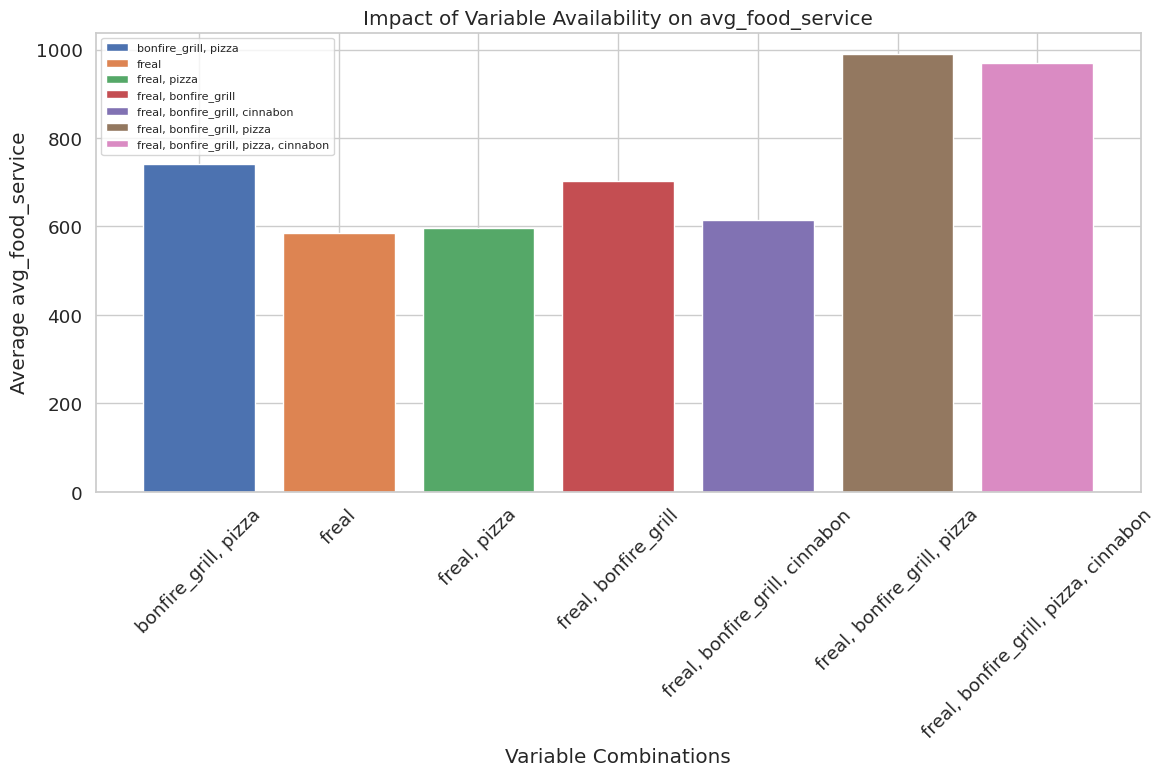

In [ ]:
bonfire_unique = bonfire.copy()

# Group by 'site_id_msba' and calculate the average for each group
bonfire_unique['avg_inside_sales'] = bonfire_unique.groupby('site_id_msba')['daily_yoy_ndt.total_inside_sales'].transform('mean')
bonfire_unique['avg_food_service'] = bonfire_unique.groupby('site_id_msba')['daily_yoy_ndt.total_food_service'].transform('mean')
bonfire_unique['avg_diesel'] = bonfire_unique.groupby('site_id_msba')['diesel_x'].transform('mean')
bonfire_unique['avg_unleaded'] = bonfire_unique.groupby('site_id_msba')['unleaded'].transform('mean')

# Columns to keep in the DataFrame
columns_to_keep = ['capital_projects.soft_opening_date', 'site_id_msba', 'avg_inside_sales', 'avg_food_service', 'avg_diesel', 'avg_unleaded']

# New DataFrame with only the specified columns
bonfire_unique = bonfire_unique[columns_to_keep].copy()

# Dropping duplicate rows based on'site_id_msba'
bonfire_unique = bonfire_unique.drop_duplicates(subset=['site_id_msba'])

# Merging bonfire_unique with store_features
merged_data = pd.merge(bonfire_unique, store_features, on='site_id_msba')

# Sorting the merged dataset by 'site_id_msba' in ascending order
merged_data = merged_data.sort_values(by='site_id_msba', ascending=True)

# Resetting the index to ensure continuous row numbering
merged_data = merged_data.reset_index(drop=True)

merged_data_food = merged_data.copy()

# Convert 'Yes' and 'No' to 1 and 0 for the relevant columns
columns_to_convert = ['freal', 'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza']
merged_data_food[columns_to_convert] = (merged_data_food[columns_to_convert] == 'Yes').astype(int)

# Group the data and calculate the mean of avg_food_service
grouped_data = merged_data_food.groupby(columns_to_convert)['avg_food_service'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Labels for the legend
x_labels = ['freal', 'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza']

combinations = grouped_data[x_labels].drop_duplicates()

for i, row in combinations.iterrows():
    label = ', '.join([x_labels[j] for j in range(len(x_labels)) if row[j] == 1])
    plt.bar(label, grouped_data[(grouped_data[x_labels] == row).all(axis=1)]['avg_food_service'].values[0], label=label)

# Reduce legend box size
plt.legend(loc='upper left', prop={'size': 8})

plt.title('Impact of Variable Availability on avg_food_service')
plt.xlabel('Variable Combinations')
plt.ylabel('Average avg_food_service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



From the aboove bar plot, it can be depicted that the presence of bonfire_grill and pizza can have a positve impact on the food service sales.

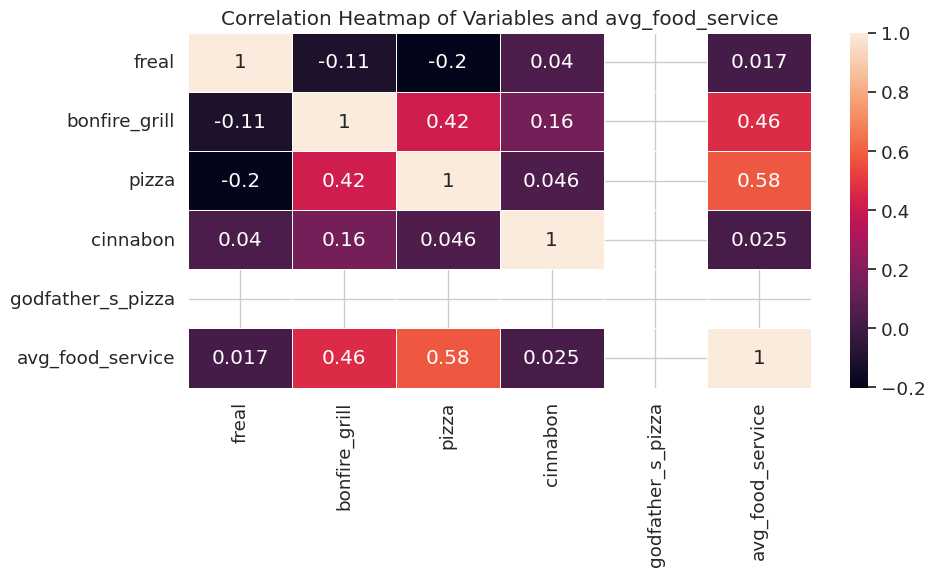

In [ ]:
# Select the columns of interest
columns_to_analyze = ['freal', 'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza', 'avg_food_service']

# Subset the data
subset_data = merged_data_food[columns_to_analyze]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap of Variables and avg_food_service')
plt.tight_layout()
plt.show()

Here, the coorelation between avg_food_service sales with pizza is 0.58 and the coorelation between avg_food_service sales with bonfire_grill is 0.46. This suggests that pizza and bonfire have strong positive coorelation with avg_food_service. Also, pizza and bonfire have a positive coorelation of 0.42 between them.

##<a name = "AOD"> Analysis on Demographics </a>

### Corelation - Avg inside sales Vs population

<Figure size 1200x800 with 0 Axes>

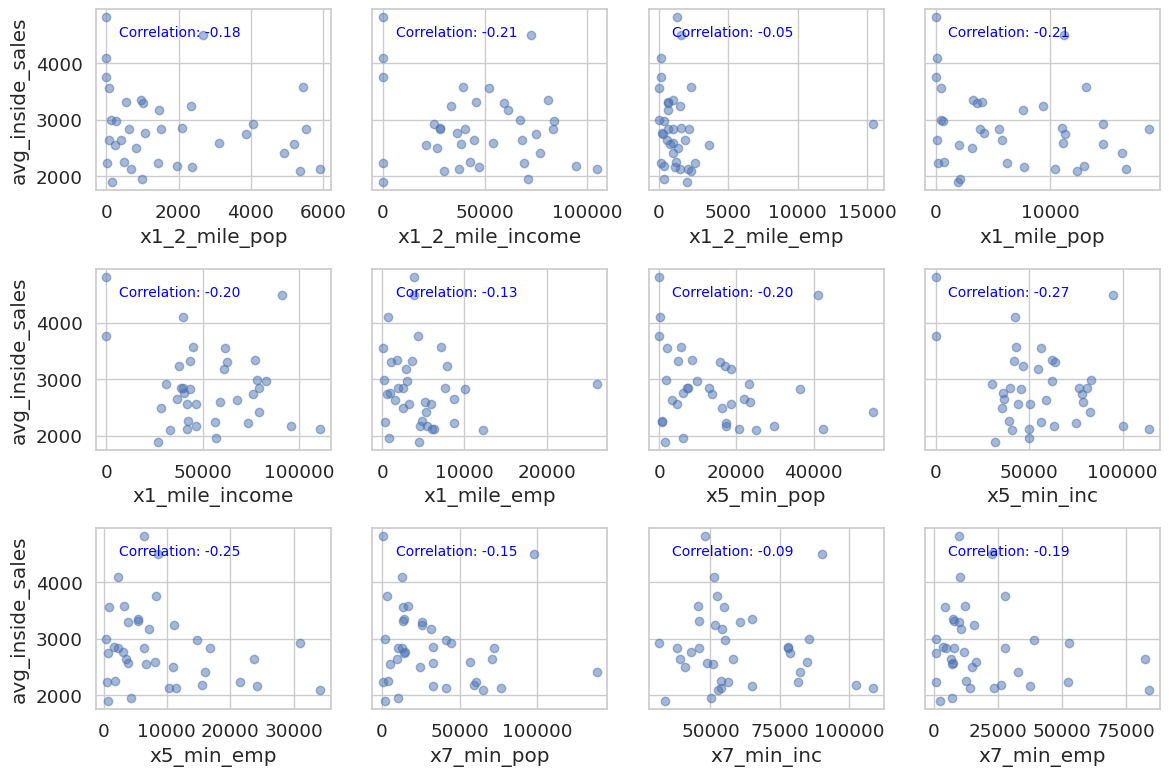

In [ ]:
# Demographic columns
demographics_columns = ['x1_2_mile_pop', 'x1_2_mile_income', 'x1_2_mile_emp',
                        'x1_mile_pop', 'x1_mile_income', 'x1_mile_emp',
                        'x5_min_pop', 'x5_min_inc', 'x5_min_emp',
                        'x7_min_pop', 'x7_min_inc', 'x7_min_emp']

# Looping through the target variables
for target_variable in ['avg_inside_sales']:
    plt.figure(figsize=(12, 8))

    # Subplots with shared y-axes for each row
    fig, axes = plt.subplots(3, 4, figsize=(12, 8), sharey=True)
    fig.subplots_adjust(wspace=0.4, hspace=0.4)

    for i, demo_column in enumerate(demographics_columns):
        ax = axes[i // 4, i % 4]  # Get the correct subplot

        # Scatter plot
        ax.scatter(merged_data[demo_column], merged_data[target_variable], alpha=0.5)
        ax.set_xlabel(demo_column)

        if i % 4 == 0:
            ax.set_ylabel(target_variable)

        # Calculation of the correlation coefficient
        correlation_coefficient = np.corrcoef(merged_data[demo_column], merged_data[target_variable])[0, 1]

        # Display correlation value inside the plot
        ax.text(0.1, 0.85, f'Correlation: {correlation_coefficient:.2f}', transform=ax.transAxes, fontsize=10, color='blue')

    plt.tight_layout()
    plt.show()


In this analysis, we have examined the relationships between income (inc), population (pop), workplace individuals (emp) within various proximity radii (1/2 mile, 1 mile, 5 minutes, and 7 minutes) and the average inside sales of the stores. The observed correlations between these demographic factors and inside sales appear to be negative. However, it is worth noting that the most substantial negative correlation observed is only -0.27. Therefore, further investigation is required to gain a more comprehensive understanding of how these demographic variables may impact inside sales.

### Corelation - Avg Food sales Vs population

<Figure size 1200x800 with 0 Axes>

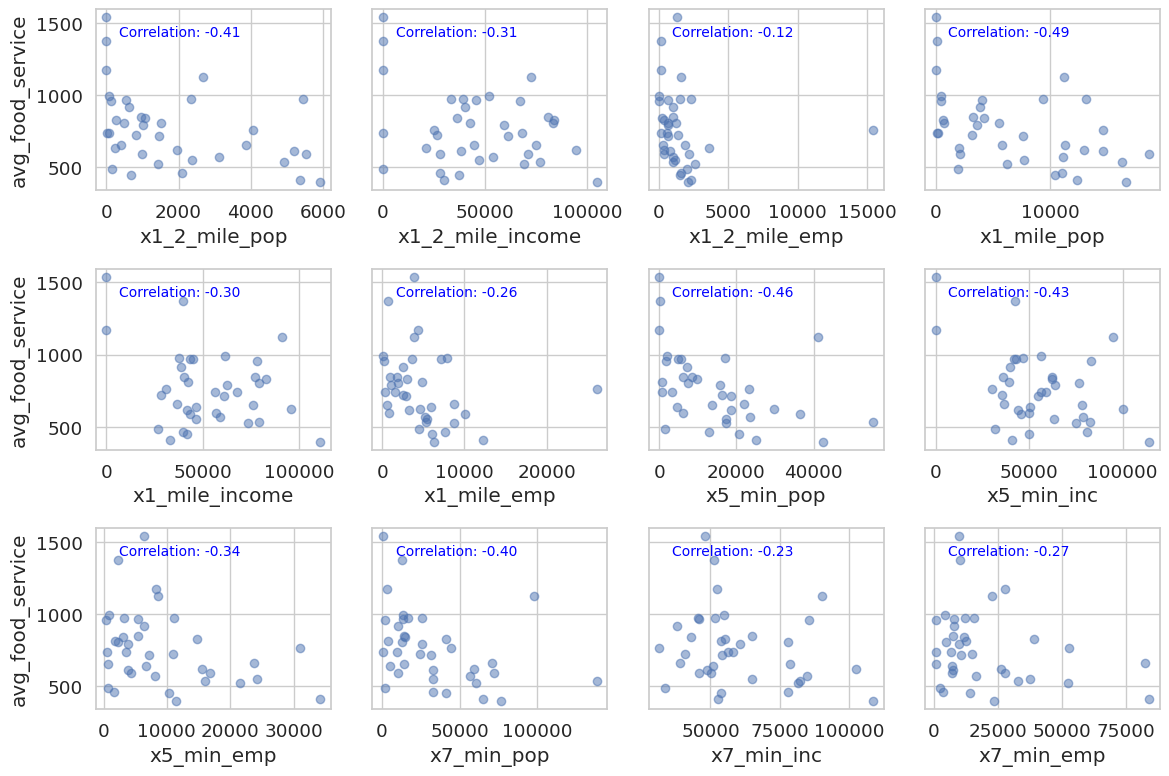

In [ ]:
# Looping through the target variables
for target_variable in ['avg_food_service']:
    plt.figure(figsize=(12, 8))

    # Subplots with shared y-axes for each row
    fig, axes = plt.subplots(3, 4, figsize=(12, 8), sharey=True)
    fig.subplots_adjust(wspace=0.4, hspace=0.4)

    for i, demo_column in enumerate(demographics_columns):
        ax = axes[i // 4, i % 4]  # Get the correct subplot

        # Scatter plot
        ax.scatter(merged_data[demo_column], merged_data[target_variable], alpha=0.5)
        ax.set_xlabel(demo_column)

        if i % 4 == 0:
            ax.set_ylabel(target_variable)

        # Calculation of the correlation coefficient
        correlation_coefficient = np.corrcoef(merged_data[demo_column], merged_data[target_variable])[0, 1]

        # Display correlation value inside the plot
        ax.text(0.1, 0.85, f'Correlation: {correlation_coefficient:.2f}', transform=ax.transAxes, fontsize=10, color='blue')

    plt.tight_layout()
    plt.show()

Much like the observations made for inside sales, we have found that average food services also exhibit negative correlations with various demographic factors. However, it's important to note that the minimum negative correlation value observed is -0.12 (specifically with 'x1_2_mile_emp'), while the maximum negative correlation value is -0.49 (observed with 'x1_mile_pop'). This suggests that there is an adverse relationship between food services and factors such as population, the number of working individuals, and income, as indicated by the correlation values. To gain a more thorough understanding of these relationships, we will delve further in the modeling phase of our analysis.

### Corelation - Avg Diesel Vs population

<Figure size 1200x800 with 0 Axes>

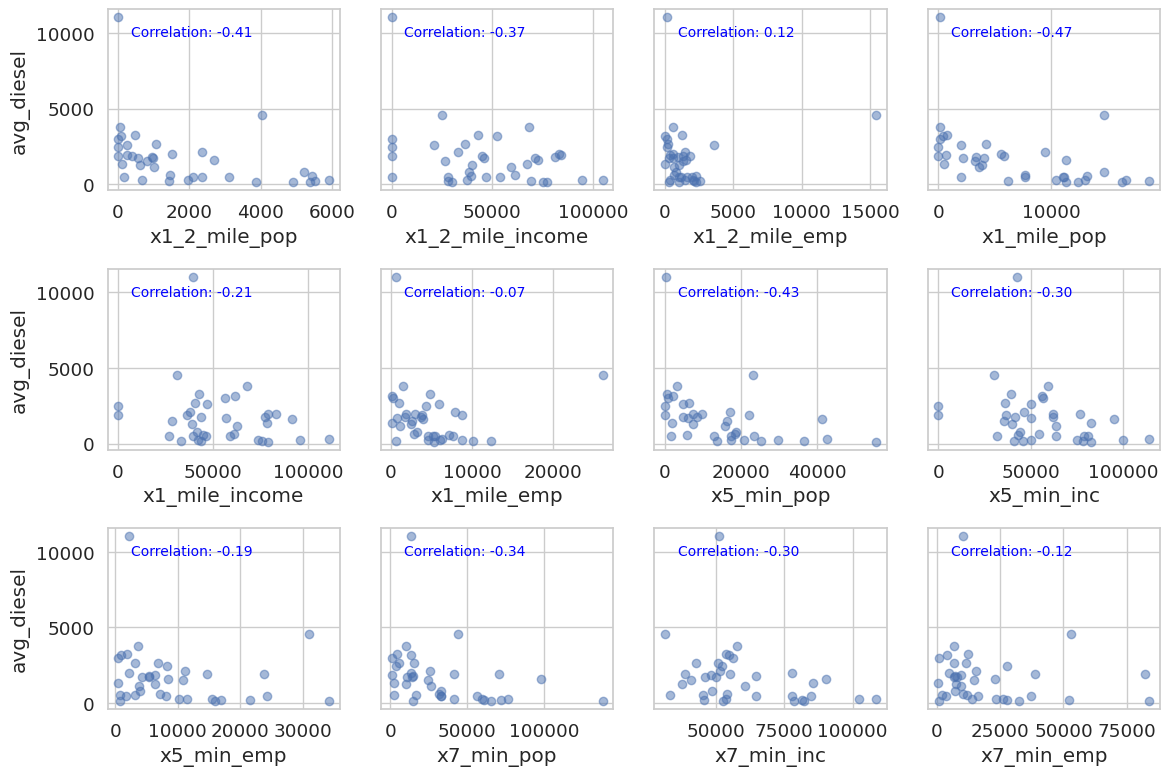

In [ ]:
# Looping through the target variables
for target_variable in ['avg_diesel']:
    plt.figure(figsize=(12, 8))

    # Subplots with shared y-axes for each row
    fig, axes = plt.subplots(3, 4, figsize=(12, 8), sharey=True)
    fig.subplots_adjust(wspace=0.4, hspace=0.4)

    for i, demo_column in enumerate(demographics_columns):
        ax = axes[i // 4, i % 4]  # Get the correct subplot

        # Scatter plot
        ax.scatter(merged_data[demo_column], merged_data[target_variable], alpha=0.5)
        ax.set_xlabel(demo_column)

        if i % 4 == 0:
            ax.set_ylabel(target_variable)

        # Calculation of the correlation coefficient
        correlation_coefficient = np.corrcoef(merged_data[demo_column], merged_data[target_variable])[0, 1]

        # Display correlation value inside the plot
        ax.text(0.1, 0.85, f'Correlation: {correlation_coefficient:.2f}', transform=ax.transAxes, fontsize=10, color='blue')

    plt.tight_layout()
    plt.show()

In this context, we can observe that the correlations between diesel gallons sold and various demographic factors tend to be relatively weaker in most cases. Notably, there is a positive correlation of 0.12 between average diesel sales (avg_diesel) and the number of working individuals within a half-mile radius (x1_2_mile_emp). Conversely, the most significant negative correlation observed, with a value of -0.47, was found to be associated with the population within a one-mile radius (x1_mile_pop).

### Corelation - Avg Unleaded Vs population

<Figure size 1200x800 with 0 Axes>

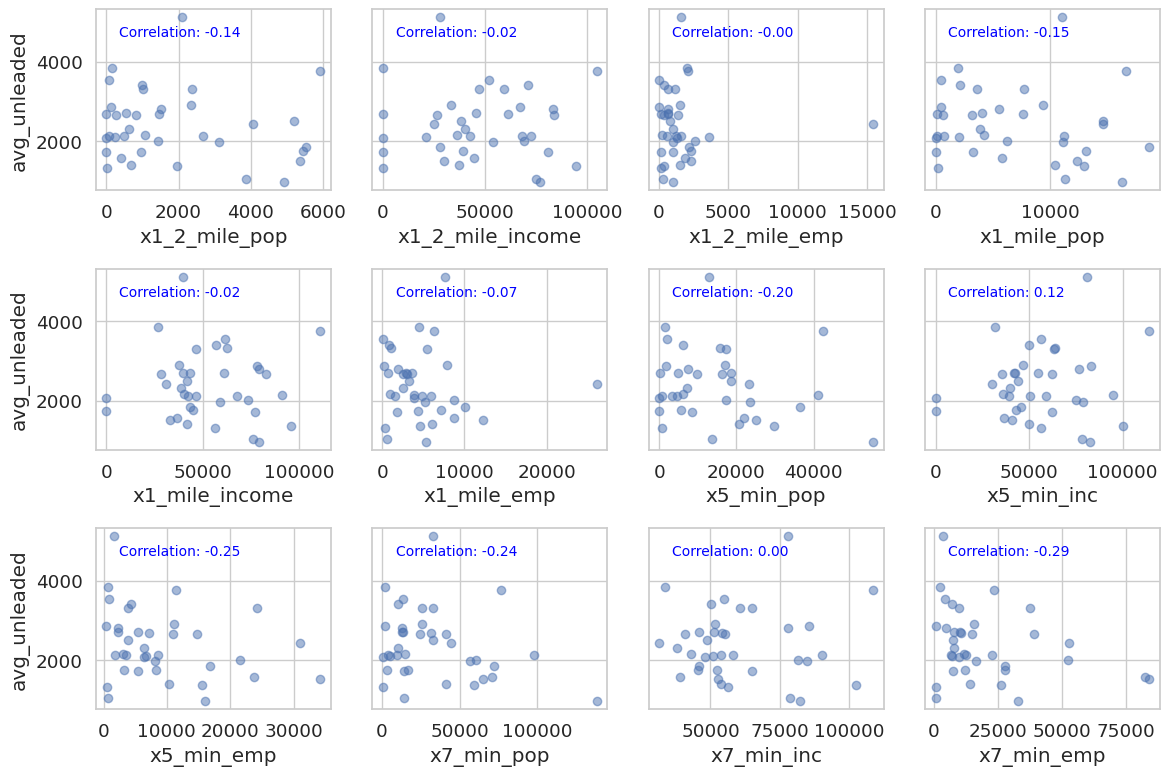

In [ ]:
# Looping through the target variables
for target_variable in ['avg_unleaded']:
    plt.figure(figsize=(12, 8))

    # Subplots with shared y-axes for each row
    fig, axes = plt.subplots(3, 4, figsize=(12, 8), sharey=True)
    fig.subplots_adjust(wspace=0.4, hspace=0.4)

    for i, demo_column in enumerate(demographics_columns):
        ax = axes[i // 4, i % 4]  # Get the correct subplot

        # Scatter plot
        ax.scatter(merged_data[demo_column], merged_data[target_variable], alpha=0.5)
        ax.set_xlabel(demo_column)

        if i % 4 == 0:
            ax.set_ylabel(target_variable)

        # Calculation of the correlation coefficient
        correlation_coefficient = np.corrcoef(merged_data[demo_column], merged_data[target_variable])[0, 1]

        # Display correlation value inside the plot
        ax.text(0.1, 0.85, f'Correlation: {correlation_coefficient:.2f}', transform=ax.transAxes, fontsize=10, color='blue')

    plt.tight_layout()
    plt.show()

The correlation between average unleaded fuel sales (avg_unleaded) and demographic factors appears to be relatively weak. A positive correlation of 0.12 is observed between avg_unleaded sales and income within a five-minute radius (x5_min_inc). The most substantial negative correlation, with a value of -0.29, was found in this analysis.

### Corelation - Avg  sales Vs population ratio

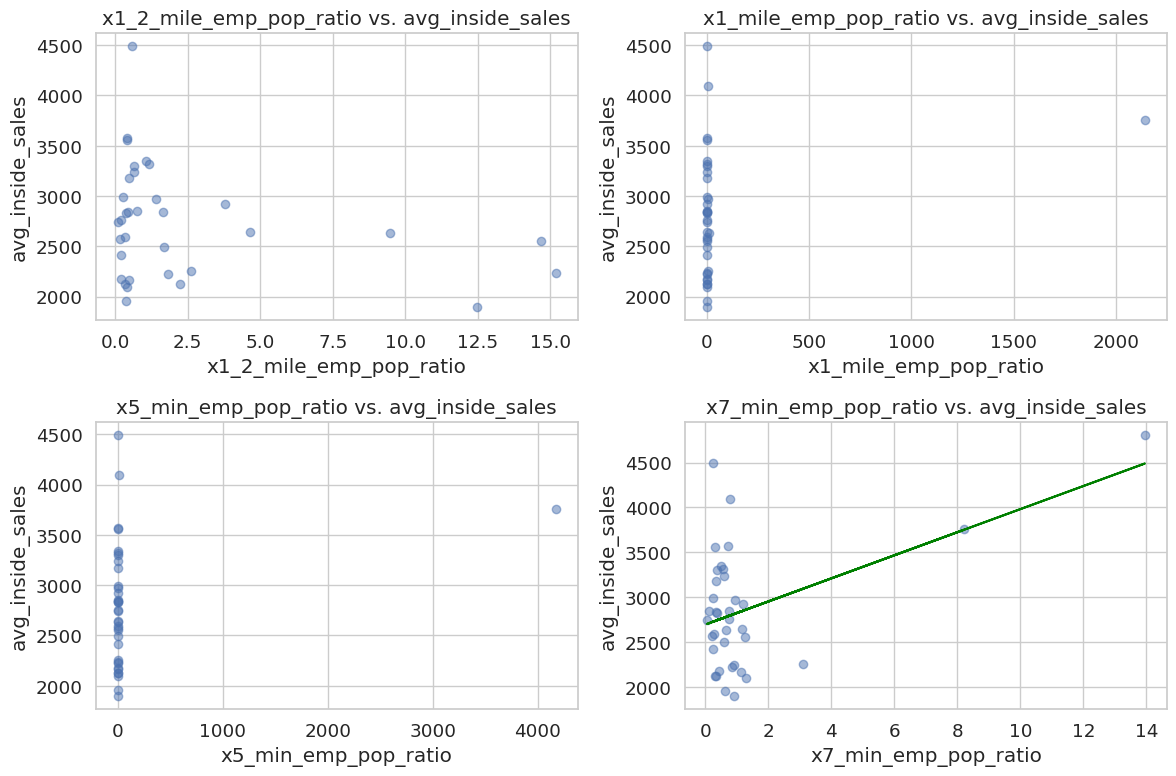

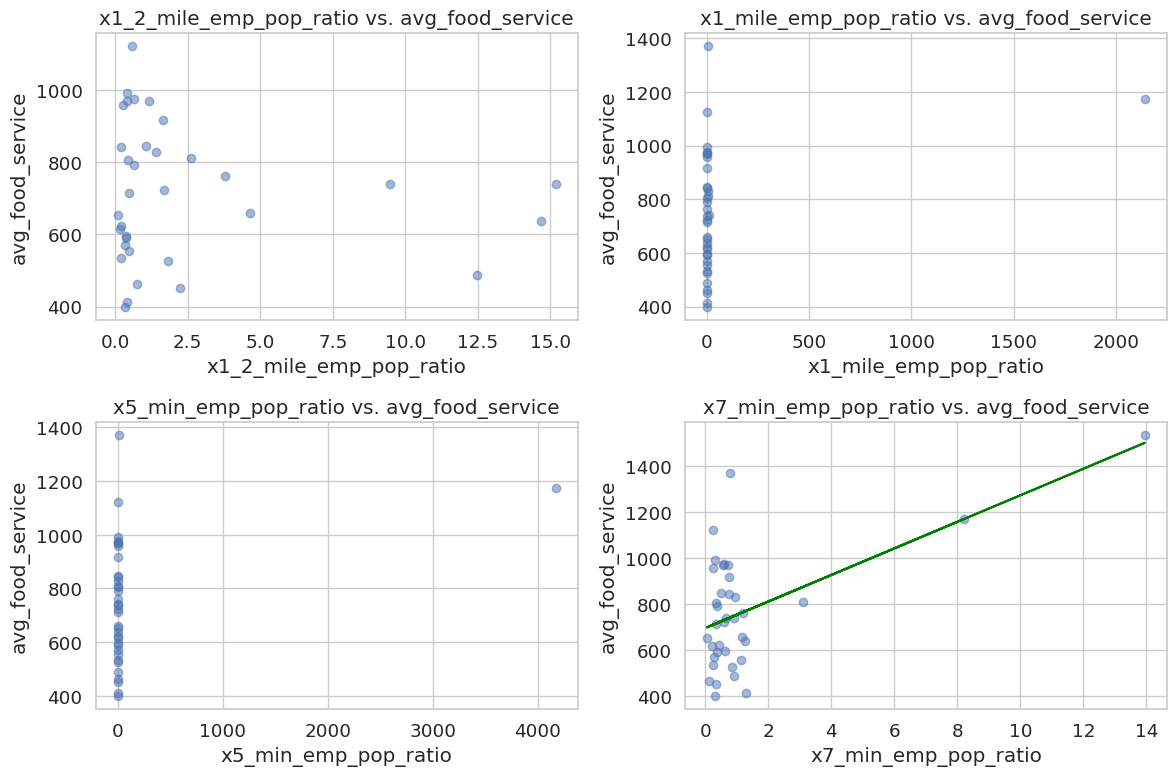

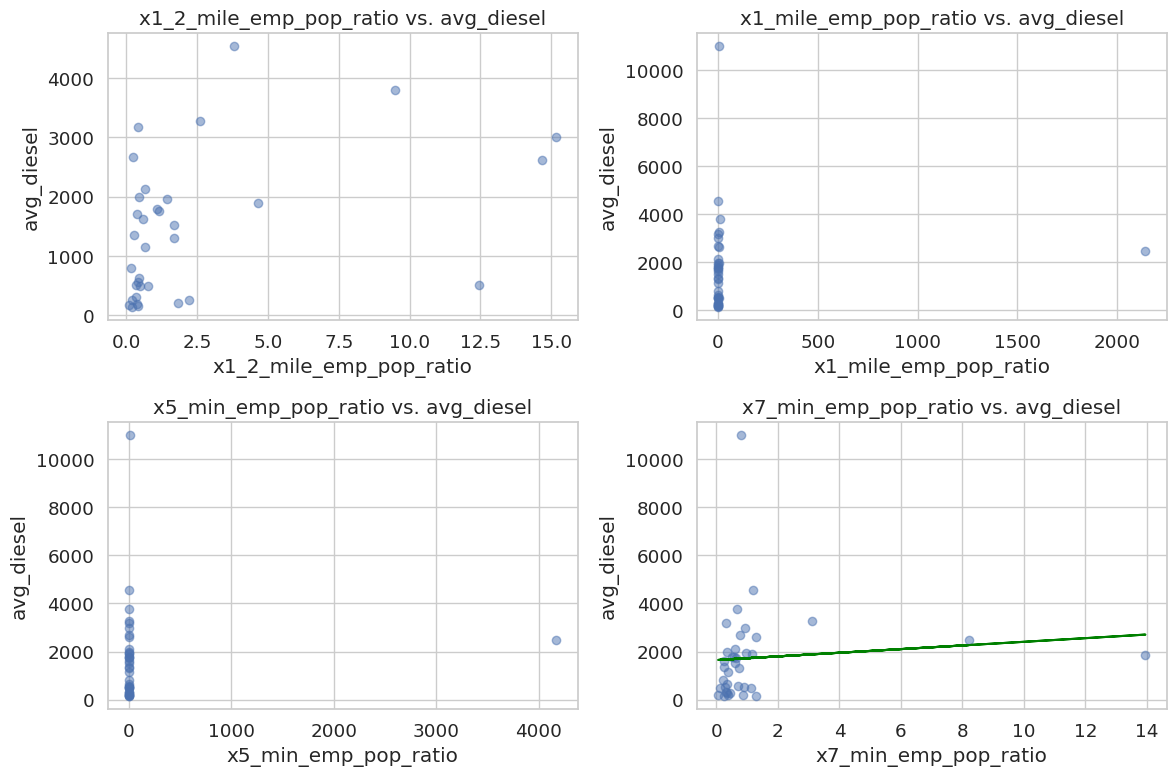

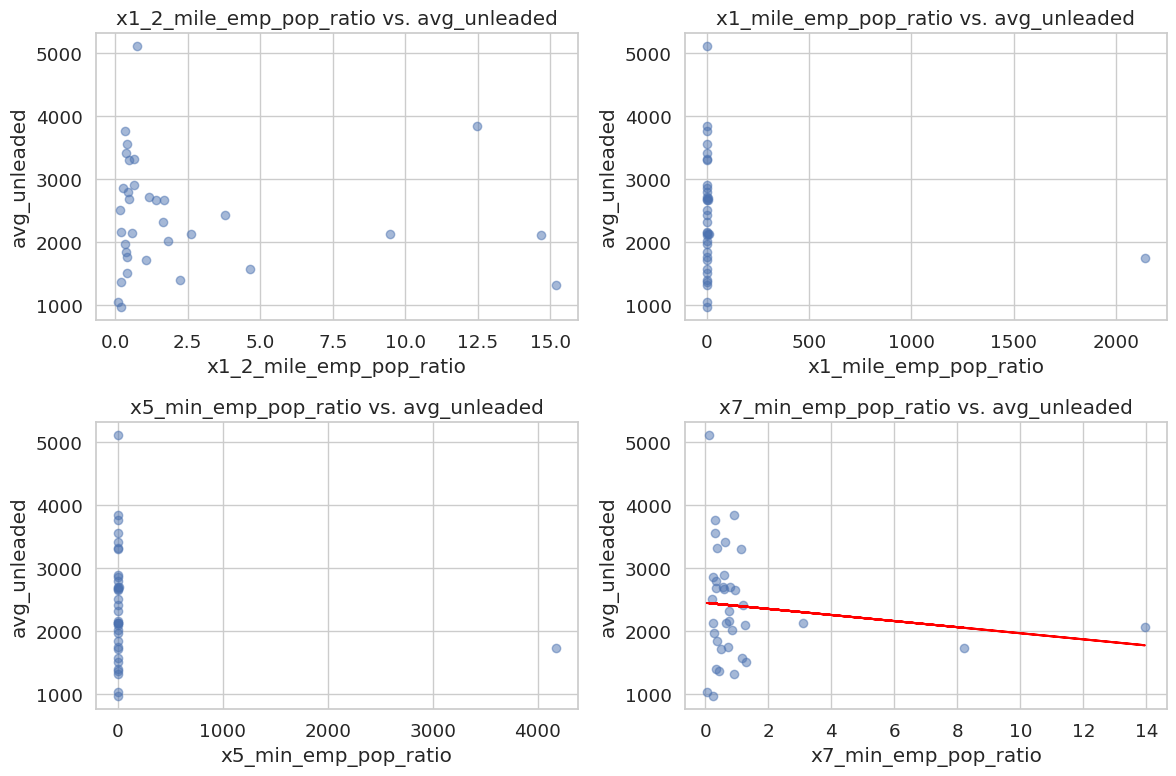

In [ ]:
# Employee-to-population ratios for each radius
merged_data['x1_2_mile_emp_pop_ratio'] = merged_data['x1_2_mile_emp'] / merged_data['x1_2_mile_pop']
merged_data['x1_mile_emp_pop_ratio'] = merged_data['x1_mile_emp'] / merged_data['x1_mile_pop']
merged_data['x5_min_emp_pop_ratio'] = merged_data['x5_min_emp'] / merged_data['x5_min_pop']
merged_data['x7_min_emp_pop_ratio'] = merged_data['x7_min_emp'] / merged_data['x7_min_pop']

# Columns of interest
employee_population_ratios = ['x1_2_mile_emp_pop_ratio', 'x1_mile_emp_pop_ratio',
                              'x5_min_emp_pop_ratio', 'x7_min_emp_pop_ratio']

# Looping through the target variables
for target_variable in ['avg_inside_sales', 'avg_food_service', 'avg_diesel', 'avg_unleaded']:
    plt.figure(figsize=(12, 8))
    for i, emp_pop_ratio_column in enumerate(employee_population_ratios):
        plt.subplot(2, 2, i + 1)

        # Scatter plot for the current employee-to-population ratio vs. the target variable
        plt.scatter(merged_data[emp_pop_ratio_column], merged_data[target_variable], alpha=0.5)
        plt.xlabel(emp_pop_ratio_column)
        plt.ylabel(target_variable)
        plt.title(f'{emp_pop_ratio_column} vs. {target_variable}')

        # Linear regression statistics
        x = merged_data[emp_pop_ratio_column]
        y = merged_data[target_variable]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

        # Correlation direction (positive or negative)
        correlation_direction = "Positive" if slope > 0 else "Negative"

        # Trend line in green for positive correlation and red for negative correlation
        if correlation_direction == "Positive":
            color = 'green'
        else:
            color = 'red'

        # Plotting the regression line
        plt.plot(x, slope * x + intercept, color=color)

    plt.tight_layout()
    plt.show()

This analysis involved a comparison of the employee-to-population ratio with the target variables. It was observed that as the employee-to-population ratio increased, the target variables showed a tendency for positive correlations, a trend that is visually represented by the trend lines. Specifically, both food service and inside sales exhibited notably strong positive correlations with the employee-to-population ratio at the seven-minute radius (x7_min). Additionally, there was a slight positive trend with diesel sales, although it was less pronounced. However, diesel sales displayed a negative trend in certain cases. These overall findings will be further explored and interpreted in the subsequent modeling phase.

##<a name = "LE"> Label Encoding </a>

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_columns = bonfire.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to object columns
for col in object_columns:
    bonfire[col] = label_encoder.fit_transform(bonfire[col])



The Label Encoder transforms categorical variables into numerical values, preparing the data for identifying key contributors effectively.

In [ ]:
bonfire.head()

capital_projects.soft_opening_date  calendar.fiscal_week_id_for_year  \
0                         2021-01-12                                 2   
1                         2021-01-12                                 2   
2                         2021-01-12                                 2   
3                         2021-01-12                                 3   
4                         2021-01-12                                 3   

   calendar.day_of_week  calendar_information.holiday  \
0                     5                            16   
1                     6                            16   
2                     4                            16   
3                     0                            16   
4                     2                            16   

   calendar_information.type_of_day  daily_yoy_ndt.total_inside_sales  \
0                                 0                         2036.2685   
1                                 0                         2379.8880   
2                                 0                         2435.8600   
3                                 0                         2805.9780   
4                                 1                         2314.7635   

   daily_yoy_ndt.total_food_service   diesel_x   unleaded  site_id_msba  ...  \
0                          762.8530  1424.1850  1522.0030         21560  ...   
1                         1003.7930  1303.8445  1853.7715         21560  ...   
2                          974.2250  1375.6785  2122.4070         21560  ...   
3                          911.0115  1334.9175  2267.9930         21560  ...   
4                          715.7535   831.1625  1819.6395         21560  ...   

   hi_flow_lanes_fueling_positions_2  rv_lanes_fueling_positions_2  \
0                                4.0                           6.0   
1                                4.0                           6.0   
2                                4.0                           6.0   
3                                4.0                           6.0   
4                                4.0                           6.0   

   hi_flow_rv_lanes_layout  hi_flow_rv_lanes_stack_type  non_24_hour  \
0                        2                            0            0   
1                        2                            0            0   
2                        2                            0            0   
3                        2                            0            0   
4                        2                            0            0   

   self_check_out  mens_toilet_count  mens_urinal_count  womens_toilet_count  \
0               0                2.0                2.0                  6.0   
1               0                2.0                2.0                  6.0   
2               0                2.0                2.0                  6.0   
3               0                2.0                2.0                  6.0   
4               0                2.0                2.0                  6.0   

   womens_sink_count  
0                2.0  
1                2.0  
2                2.0  
3                2.0  
4                2.0  

[5 rows x 69 columns]

##<a name = "TCF"> Top Contributing Factors </a>

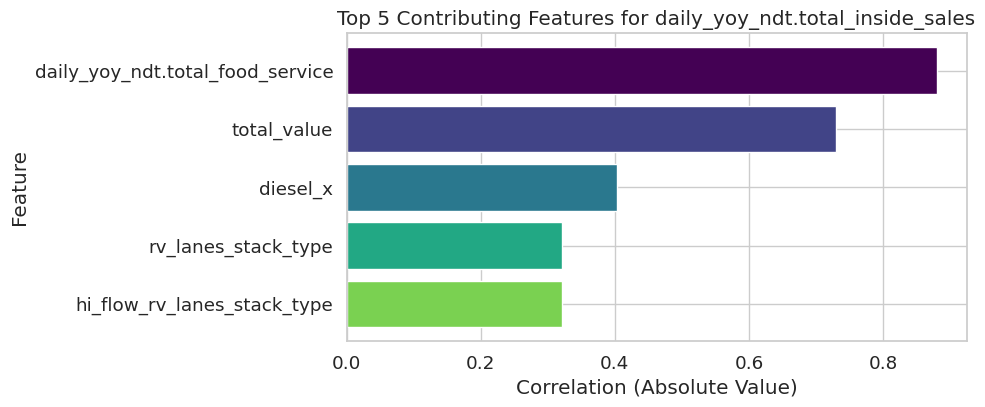

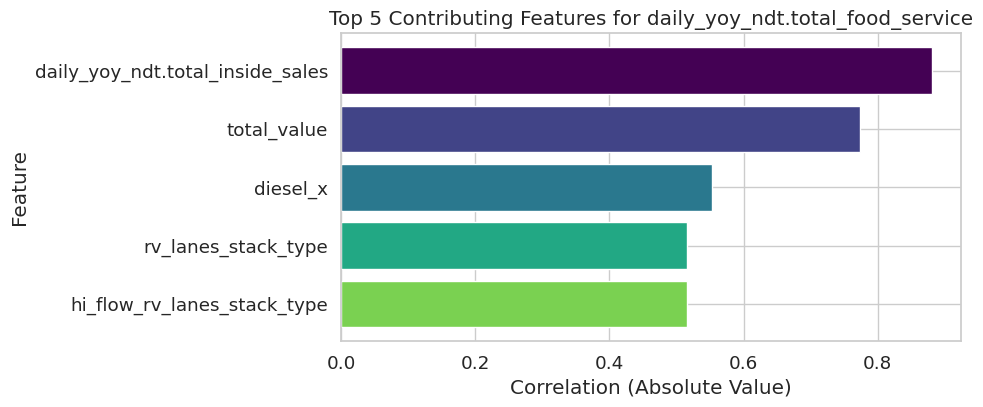

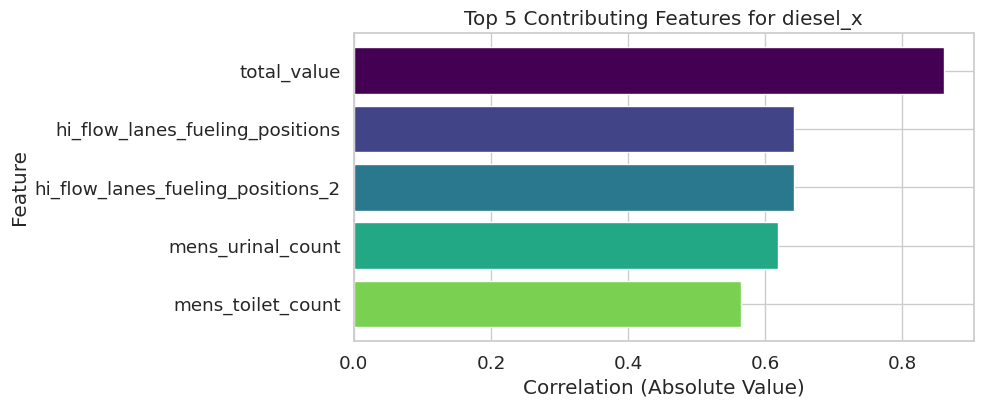

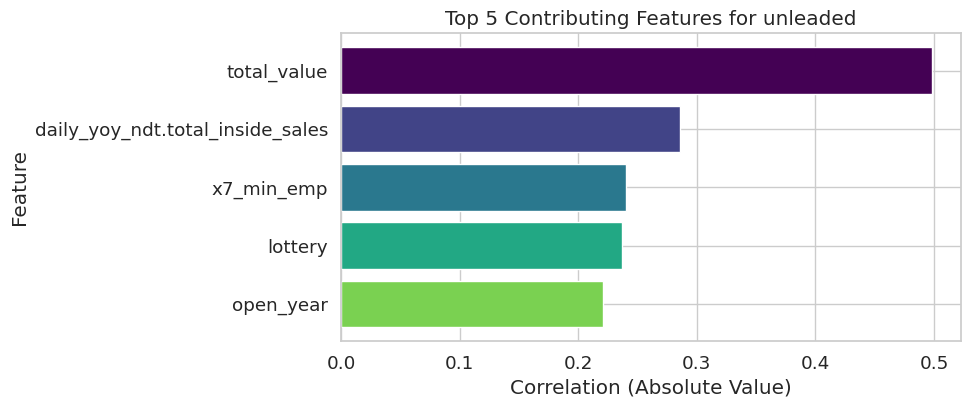

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define your target variables
target_variables = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel_x', 'unleaded']

# Initialize a DataFrame to store correlation results
correlation_results = pd.DataFrame(index=bonfire.columns, columns=target_variables)

# Calculate correlations for each target variable
for target in target_variables:
    correlations = bonfire.corr()[target]
    correlation_results[target] = correlations.abs().sort_values(ascending=False)

# Create horizontal bar plots for the top 5 contributing features for each target variable using Matplotlib
colors = plt.cm.viridis(np.linspace(0, 1, 6))  # Create a color palette
for target in target_variables:
    top_contributors = correlation_results[target].nlargest(6)  # Get the top 5 contributors + the target itself
    top_contributors = top_contributors.drop(target)  # Drop the target variable itself

    # Create a horizontal bar plot
    plt.figure(figsize=(8, 4))
    plt.barh(top_contributors.index, top_contributors.values, color=colors)

    # Customize the appearance
    plt.xlabel('Correlation (Absolute Value)')
    plt.ylabel('Feature')
    plt.title(f'Top 5 Contributing Features for {target}')
    plt.gca().invert_yaxis()  # Invert the y-axis to show the top contributor at the top

    # Show the plot
    plt.show()


The above plots illustrate the primary factors influencing sales metrices such as diesel, unleaded, food, and inside sales. The following observations are made:
1. Inside sales exhibit a strong positive correlation with food sales, boasting a substantial correlation coefficient of 0.880. Diesel sales also contribute positively, albeit to a lesser extent, with a correlation coefficient of 0.404. Following these, other factors such as RV lanes-stake type and high-flow RV lanes stake contribute, along with high-lane fueling positions.
2. Food sales demonstrate a robust positive correlation with inside sales, emphasizing a strong relationship with a correlation coefficient of 0.880. Diesel sales also have a positive influence, with a correlation coefficient of 0.553. Additional factors, including RV lanes-stake type and high-flow RV lanes stake, contribute to the overall picture.
3. Diesel sales are notably correlated with high-lane fueling positions, with a correlation coefficient of 0.642. Mens urinal counts come in second, with a correlation coefficient of 0.618. Other contributing factors include mens toilet count and women-sink-count.
4. In contrast, unleaded sales do not exhibit strong correlations with other factors. However, they do show moderate positive correlation with inside sales, having a correlation coefficient of 0.282. X7-min_emp also contributes positively, albeit with a correlation coefficient of 0.240. Additional factors, such as lottery, open year, and x5-min_emp, play a role but to a lesser extent.
These observations provide insights into the relationships between various factors and sales metrics, highlighting the significance of specific variables in driving sales performance.


#<a name = "SU"> Summary </a>

**Results**  

This text presents a series of exploratory data analysis findings related to store sales and demographic factors. The key points are as follows:

* Food service and inside sales are highly correlated, suggesting that these two categories tend to move in tandem.
* Diesel and food service sales have a moderate correlation, suggesting that there is a positive relationship between these two categories, but it is not as strong as the correlation between food service and inside sales.
* Sunday is the slowest day for sales, while Friday is the busiest. This suggests that people are more likely to shop on weekends, and that businesses may want to consider offering special promotions or discounts on Fridays to attract customers.
* Average sales are generally higher on holidays than on non-holidays. This is likely due to the fact that people are more likely to spend money on holidays.
* Average sales for inside sales are generally higher than average sales for other sales categories. This may be because people are more likely to buy items from inside stores on holidays, when they are looking for a specific item or want to be able to return or exchange their purchase easily.
* Average sales for Christmas and Thanksgiving are the highest for all sales categories. This is likely due to the fact that these are two of the biggest holidays in the United States.
* Average sales for New Year's Day and New Year's Eve are the lowest for all sales categories. This may be because people are more likely to be focused on celebrating with friends and family on these holidays, rather than shopping.

In addition to the above findings, the text also highlights some key observations about the correlation between store sales and demographic factors. For example, the text notes that there is a strong positive correlation between the presence of bonfire_grill and pizza and food service sales. This suggests that these two businesses may be able to boost their sales by working together or by locating their businesses in close proximity to each other.

As the employee-to-population ratio increases, store sales tend to show a tendency for positive correlations. This suggests that businesses may (or already are) want to consider locating their businesses in areas with a high employee-to-population ratio, as this may lead to increased sales.

Overall, our target variables are impacted by many variables such as holidays, and Friday vs Sunday; therefore, findings from this analysis will be used to train and fine-tune our forecasting model for the next step.   

**Next step**
Before we jump straight into model building, we will finish cleaning the data by addressing null values and factorizing datasets. We will be splitting our merged data into training and testing sets using the 70-30 ratio method.

We will utilize the findings from our exploratory data analysis when running basic forecasting models using the current industry-leading methods such as the Naïve Base and Regression model. We will compare our model performance which is yielding the most promising results. From there, we can finalize the data we will use to train the model and which type of model we will use.

As we progress with analysis, we will continuously revisit the business problem and address any glitches in our findings.  



#<a name = "IC"> Individual Contribution </a>

Maverik EDA by BonFire Analytics, Authors:

1. Bhakti Dahal: Completed individual EDA, including data loading, cleaning, and analysis. Explored various charts for initial sales analysis and identified correlations among target variables. Compiled the entire file and refined the overall EDA.

2. Venkatachalam Kapuganti: Completed individual EDA, including data loading, cleaning, and analysis with various interactive charts. Explored correlations and identified top contributing factors.

3. Anjan Kumar: Completed individual EDA, including data loading, cleaning, and analysis. Explored various correlation charts among sales and other store parameters.

4. Tarun Gulati: Completed individual EDA, including data loading, cleaning, and analysis. Explored various sales growth charts and sales patterns.